# **Final Task**
**Project Based Internship - Data Scientist**

## **Mounting Drive**

In [1]:
# mounting ke google drive

from google.colab import drive
import os

# mounting dataset dari gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## **Import Library & Data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [3]:
app_train = pd.read_csv(r'gdrive/MyDrive/PBI_Data Scientist Home Credit Indonesia x Rakamin Academy/Dataset/application_train.csv')
bureau = pd.read_csv(r'gdrive/MyDrive/PBI_Data Scientist Home Credit Indonesia x Rakamin Academy/Dataset/bureau.csv')
prev_app = pd.read_csv(r'gdrive/MyDrive/PBI_Data Scientist Home Credit Indonesia x Rakamin Academy/Dataset/previous_application.csv')

## **Data Understanding** 📊

### **Application Dataset**

In [4]:
app_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
app_train.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [7]:
rows, cols = app_train.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 307511 rows and 122 columns


### **Bureau Dataset**

In [8]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [9]:
bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [10]:
bureau.head(10)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   
6      215354       5714468        Active      currency 1          -43   
7      162297       5714469        Closed      currency 1        -1896   
8      162297       5714470        Closed      currency 1        -1146   
9      162297       5714471        Active      currency 1        -1146   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   
5                   0              27460.0                NaN   
6                   0                 79.0                NaN   
7                   0              -1684.0            -1710.0   
8                   0               -811.0             -840.0   
9                   0               -484.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0        91323.00   
1                     NaN                   0       225000.00   
2                     NaN                   0       464323.50   
3                     NaN                   0        90000.00   
4                 77674.5                   0      2700000.00   
5                     0.0                   0       180000.00   
6                     0.0                   0        42103.80   
7                 14985.0                   0        76878.45   
8                     0.0                   0       103007.70   
9                     0.0                   0         4500.00   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                 0.00                   NaN                     0.0   
1            171342.00                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   
5             71017.38             108982.62                     0.0   
6             42103.80                  0.00                     0.0   
7                 0.00                  0.00                     0.0   
8                 0.00                  0.00                     0.0   
9                 0.00                  0.00                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN  
5      Credit card                 -31          NaN  
6  Consumer credit                 -22          NaN  
7  Consumer credit               -1710          NaN  
8  Consumer credit                -840          NaN  
9      Credit card                -690          NaN

In [11]:
rows, cols = bureau.shape
print(f"Bureau Dataset has {rows} rows and {cols} columns")

Bureau Dataset has 1716428 rows and 17 columns


### **Previous Application Dataset**

In [12]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [14]:
prev_app.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [15]:
rows, cols = prev_app.shape
print(f"Previous Application Dataset has {rows} rows and {cols} columns")

Previous Application Dataset has 1670214 rows and 37 columns


## **Data Cleaning** 🧹

### **Application Dataset**

In [16]:
# function to drop column that have missing value more than 60%

def drop_high_missing(df, threshold = 0.5):
  return df.drop(columns=df.columns[df.isnull().mean() > threshold])

In [17]:
# check duplicated value/rows in dataset
app_train.duplicated().sum()

np.int64(0)

In [18]:
# check missing values in dataset
null_value = app_train.isna().sum().sort_values(ascending=False)
app_missing_value = pd.DataFrame({'null_value': null_value}).reset_index()
app_missing_value["percentage"] = app_missing_value["null_value"]/app_train.shape[0]*100
app_missing_value.columns = ["column_name", "null_value", "percentage"]
app_missing_value[app_missing_value["percentage"] > 50]

column_name  null_value  percentage
0             COMMONAREA_AVG      214865   69.872297
1            COMMONAREA_MODE      214865   69.872297
2            COMMONAREA_MEDI      214865   69.872297
3   NONLIVINGAPARTMENTS_MEDI      213514   69.432963
4   NONLIVINGAPARTMENTS_MODE      213514   69.432963
5    NONLIVINGAPARTMENTS_AVG      213514   69.432963
6         FONDKAPREMONT_MODE      210295   68.386172
7       LIVINGAPARTMENTS_AVG      210199   68.354953
8      LIVINGAPARTMENTS_MEDI      210199   68.354953
9      LIVINGAPARTMENTS_MODE      210199   68.354953
10            FLOORSMIN_MODE      208642   67.848630
11             FLOORSMIN_AVG      208642   67.848630
12            FLOORSMIN_MEDI      208642   67.848630
13           YEARS_BUILD_AVG      204488   66.497784
14          YEARS_BUILD_MODE      204488   66.497784
15          YEARS_BUILD_MEDI      204488   66.497784
16               OWN_CAR_AGE      202929   65.990810
17             LANDAREA_MEDI      182590   59.376738
18              LANDAREA_AVG      182590   59.376738
19             LANDAREA_MODE      182590   59.376738
20         BASEMENTAREA_MODE      179943   58.515956
21         BASEMENTAREA_MEDI      179943   58.515956
22          BASEMENTAREA_AVG      179943   58.515956
23              EXT_SOURCE_1      173378   56.381073
24        NONLIVINGAREA_MODE      169682   55.179164
25         NONLIVINGAREA_AVG      169682   55.179164
26        NONLIVINGAREA_MEDI      169682   55.179164
27             ELEVATORS_AVG      163891   53.295980
28            ELEVATORS_MEDI      163891   53.295980
29            ELEVATORS_MODE      163891   53.295980
30        WALLSMATERIAL_MODE      156341   50.840783
31            APARTMENTS_AVG      156061   50.749729
32           APARTMENTS_MEDI      156061   50.749729
33           APARTMENTS_MODE      156061   50.749729
34            ENTRANCES_MODE      154828   50.348768
35            ENTRANCES_MEDI      154828   50.348768
36             ENTRANCES_AVG      154828   50.348768
37            LIVINGAREA_AVG      154350   50.193326
38           LIVINGAREA_MEDI      154350   50.193326
39           LIVINGAREA_MODE      154350   50.193326
40            HOUSETYPE_MODE      154297   50.176091

In [19]:
# drop column in application dataset

app_train_clean = drop_high_missing(app_train)

In [20]:
rows, cols = app_train_clean.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 307511 rows and 81 columns


The application dataset has 122 columns of which 41 have more than 50% missing values, after dropping the columns, 81 columns remain.

In addition, columns that will not be used in the analysis process will be discarded.

In [21]:
app_train_clean.drop(columns = [col for col in app_train_clean.columns if 'FLAG_DOCUMENT' in col], inplace=True, axis=1)

In [22]:
app_train_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [23]:
rows, cols = app_train_clean.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 307511 rows and 61 columns


After the removal of columns that have a missing value greater than 50% and then the removal of columns that will not be used in the analysis process, the final remaining columns are 61 columns out of 122 columns.

In [24]:
null_value_after = app_train_clean.isna().sum().sort_values(ascending=False)
checking = pd.DataFrame({'null_value': null_value_after}).reset_index()
checking["percentage"] = checking["null_value"]/app_train_clean.shape[0]*100
checking.columns = ["column_name", "null_value", "percentage"]
checking[checking["percentage"] > 0]

column_name  null_value  percentage
0                  FLOORSMAX_AVG      153020   49.760822
1                 FLOORSMAX_MODE      153020   49.760822
2                 FLOORSMAX_MEDI      153020   49.760822
3    YEARS_BEGINEXPLUATATION_AVG      150007   48.781019
4   YEARS_BEGINEXPLUATATION_MODE      150007   48.781019
5   YEARS_BEGINEXPLUATATION_MEDI      150007   48.781019
6                 TOTALAREA_MODE      148431   48.268517
7            EMERGENCYSTATE_MODE      145755   47.398304
8                OCCUPATION_TYPE       96391   31.345545
9                   EXT_SOURCE_3       60965   19.825307
10    AMT_REQ_CREDIT_BUREAU_HOUR       41519   13.501631
11     AMT_REQ_CREDIT_BUREAU_DAY       41519   13.501631
12     AMT_REQ_CREDIT_BUREAU_MON       41519   13.501631
13    AMT_REQ_CREDIT_BUREAU_WEEK       41519   13.501631
14     AMT_REQ_CREDIT_BUREAU_QRT       41519   13.501631
15    AMT_REQ_CREDIT_BUREAU_YEAR       41519   13.501631
16               NAME_TYPE_SUITE        1292    0.420148
17      OBS_30_CNT_SOCIAL_CIRCLE        1021    0.332021
18      DEF_60_CNT_SOCIAL_CIRCLE        1021    0.332021
19      DEF_30_CNT_SOCIAL_CIRCLE        1021    0.332021
20      OBS_60_CNT_SOCIAL_CIRCLE        1021    0.332021
21                  EXT_SOURCE_2         660    0.214626
22               AMT_GOODS_PRICE         278    0.090403
23                   AMT_ANNUITY          12    0.003902
24               CNT_FAM_MEMBERS           2    0.000650
25        DAYS_LAST_PHONE_CHANGE           1    0.000325

There are several remaining columns that still have missing values, then the data will be filled with the average, median for numerical data, or mode for categorical, or even the missing data will be deleted.

In [25]:
app_train_clean.dtypes.value_counts()

float64    27
int64      21
object     13
Name: count, dtype: int64

In [26]:
cat_cols = app_train_clean.select_dtypes(include=['object']).columns.tolist()
num_cols = app_train_clean.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"There are {len(cat_cols)} categorical columns and {len(num_cols)} numerical columns")
print(f"This is the categorical columns: {cat_cols}")
print(f"This is the numerical columns: {num_cols}")

There are 13 categorical columns and 48 numerical columns
This is the categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']
This is the numerical columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE

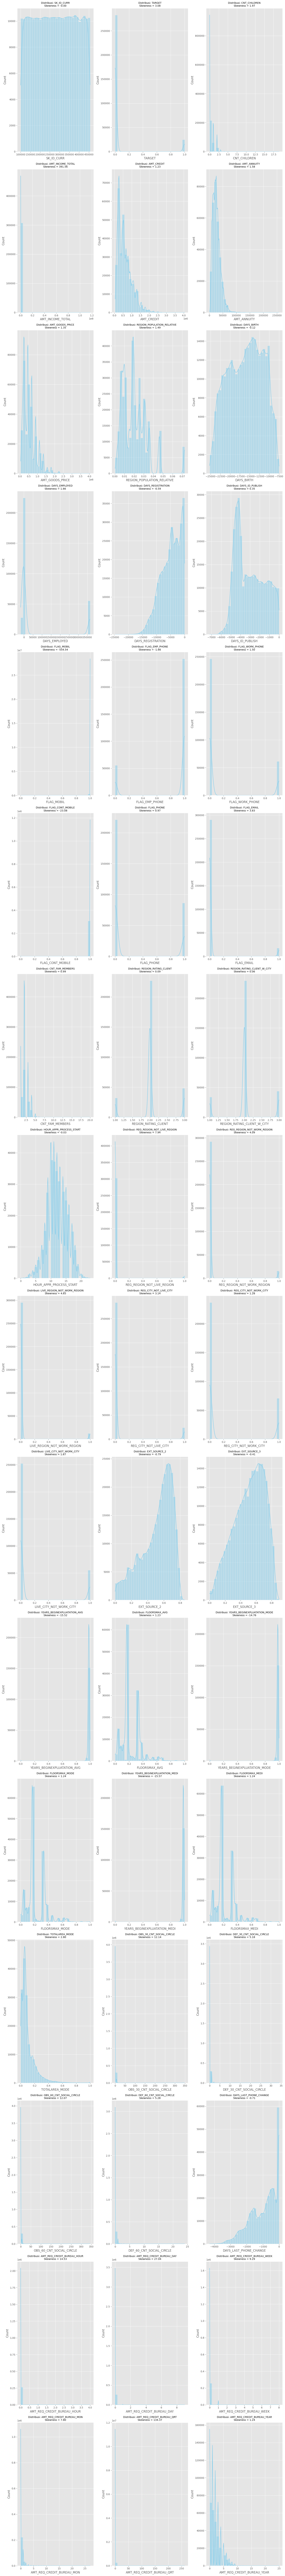

In [27]:
# Set size of plot
plt.figure(figsize=(16, len(num_cols)*3))

# Looping for each numerical columns and create that plot
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.histplot(app_train_clean[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}\nSkewness = {app_train_clean[col].skew():.2f}', fontsize=10)
    plt.tight_layout()

plt.show()

It can be seen that the distribution of features or numeric columns in the above-mentioned datasets are skewed, so the missing values in these features will be filled in by calculating the median for each feature.

In [28]:
for col in num_cols:
  if app_train_clean[col].isnull().any():
    app_train_clean[col] = app_train_clean[col].fillna(app_train_clean[col].median())

 And all missing values contained in categorical features in the dataset will be filled with the mode of each feature.

In [29]:
for col in cat_cols:
  if app_train_clean[col].isnull().any():
    app_train_clean[col] = app_train_clean[col].fillna(app_train_clean[col].mode()[0])

In [30]:
app_train_clean.isna().values.any()

np.False_

After the imputation process or filling in the value of each data that has missing values, the entire dataset can finally be said to be clean with no more missing values in the dataset.

In [31]:
app_train_clean.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

The next step is to look at the outliers contained in the numerical features in the dataset.

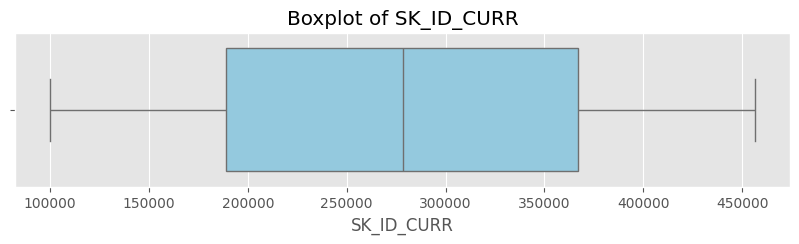

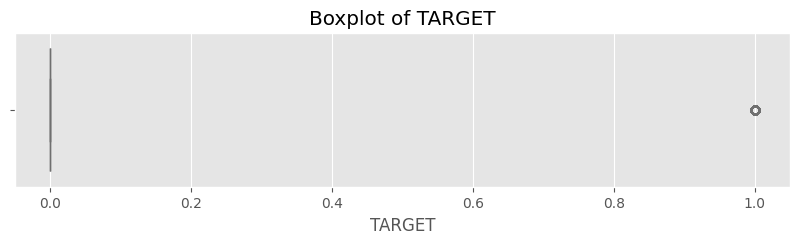

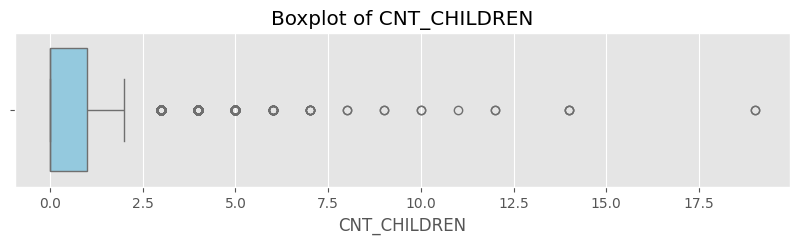

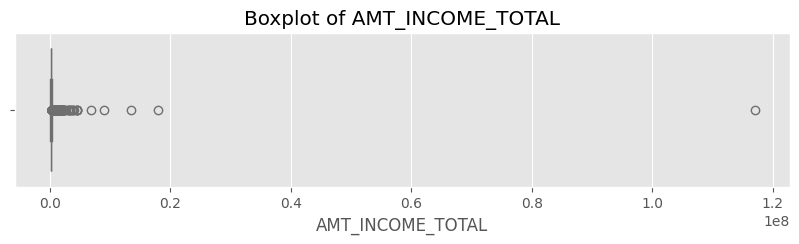

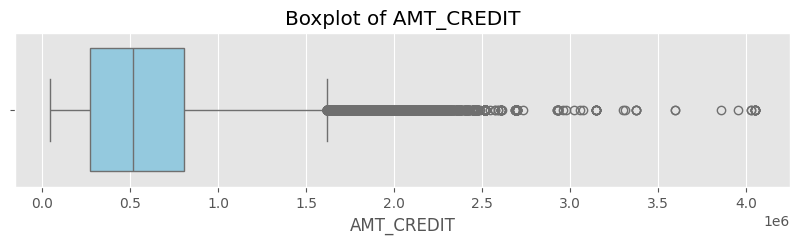

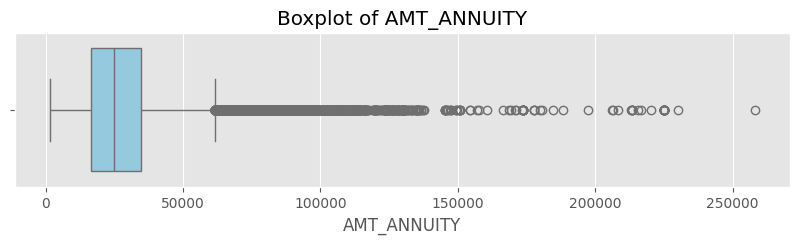

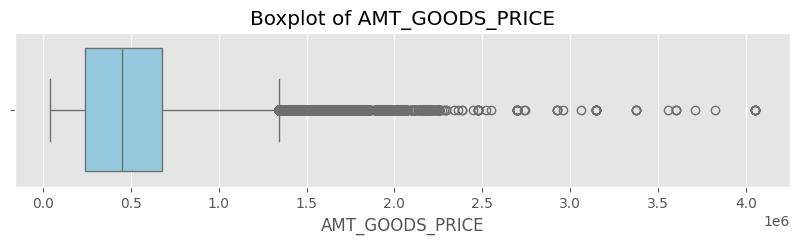

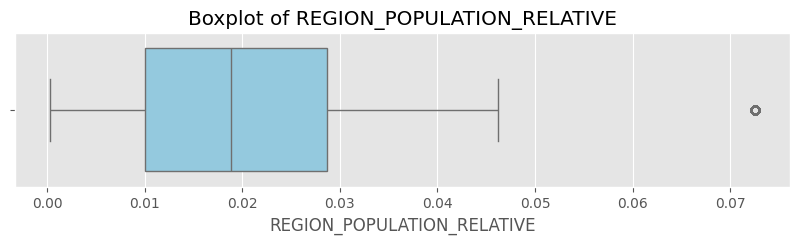

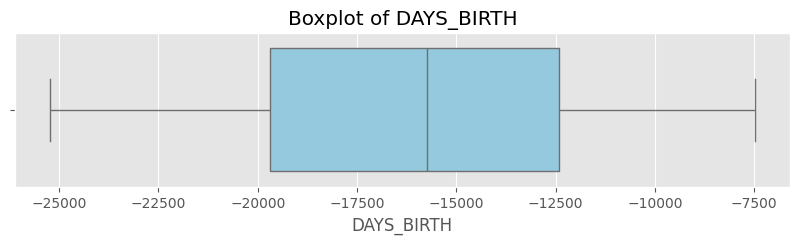

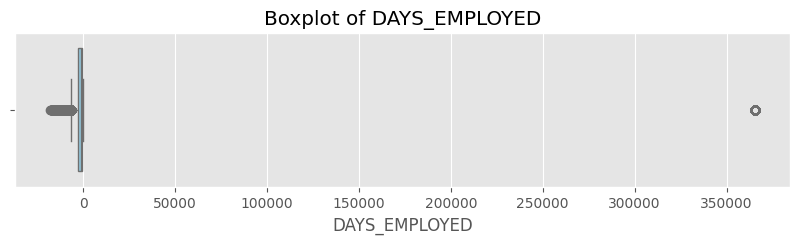

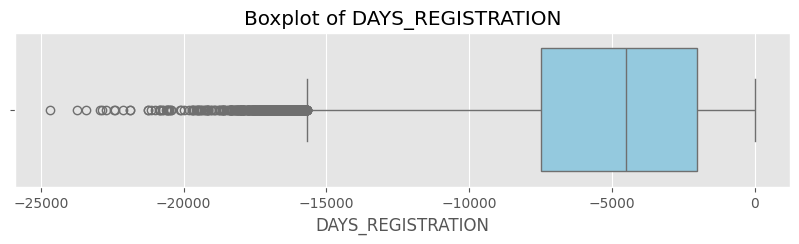

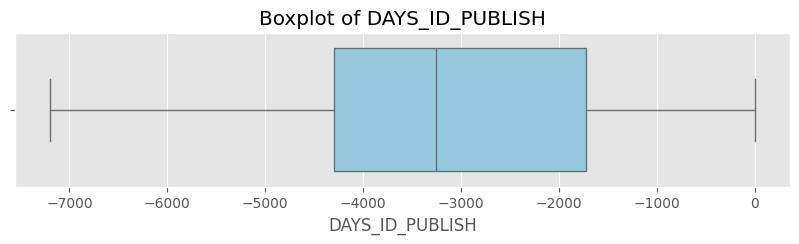

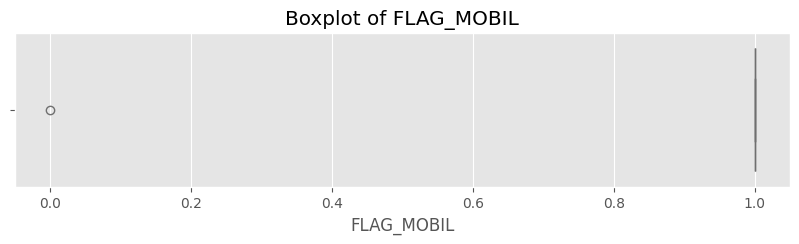

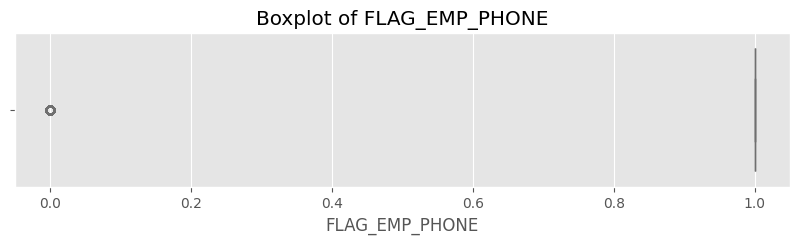

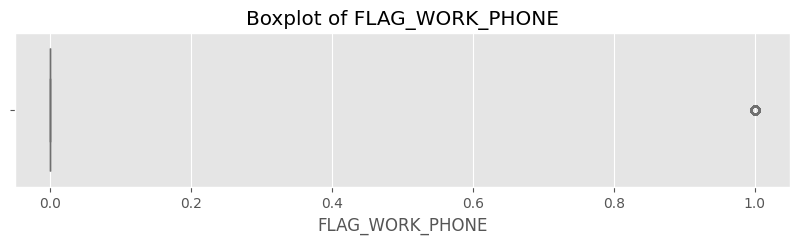

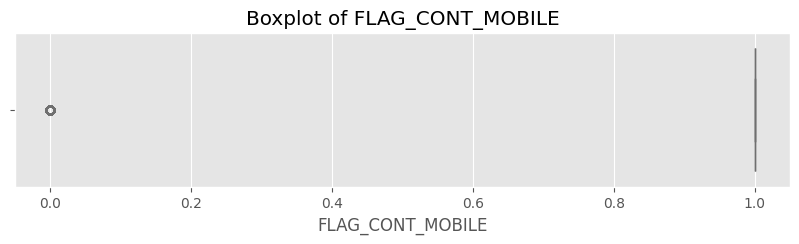

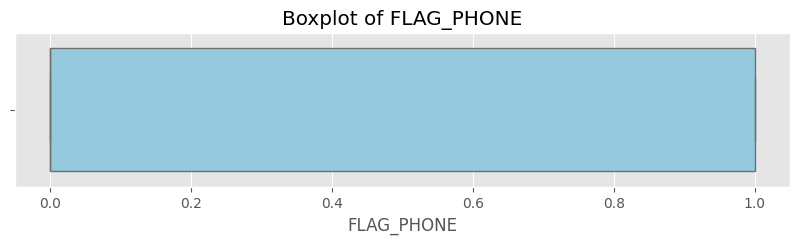

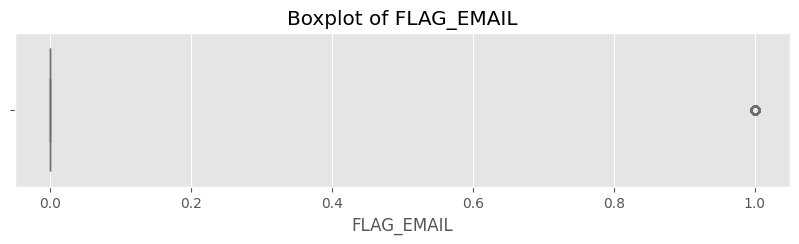

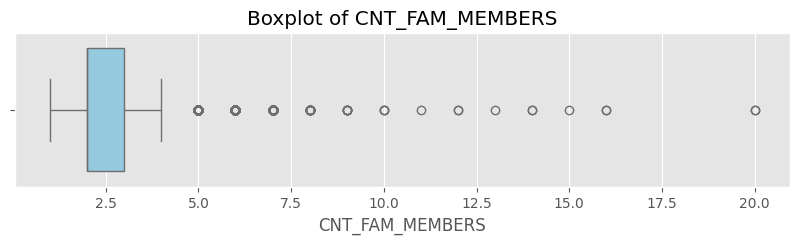

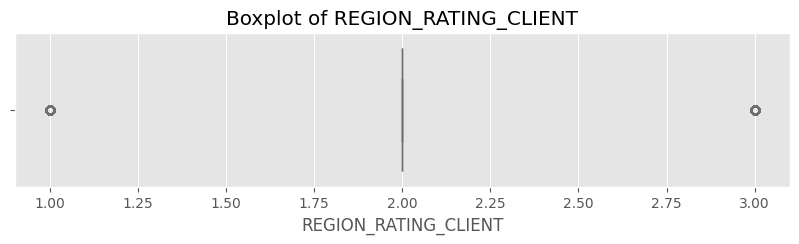

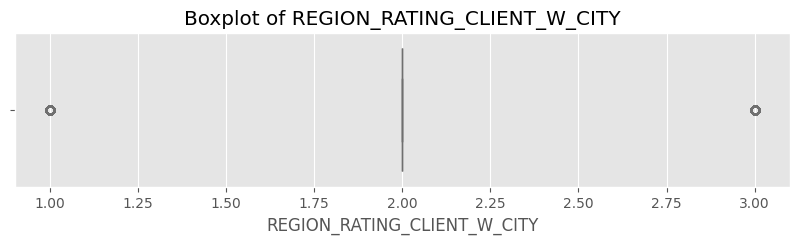

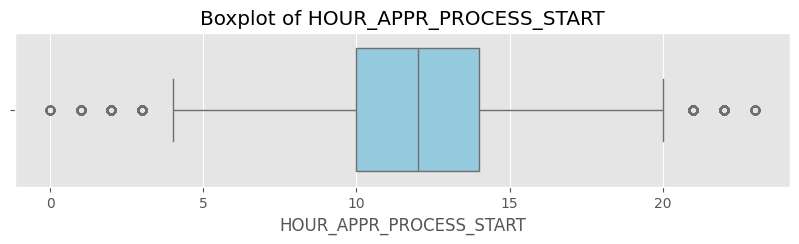

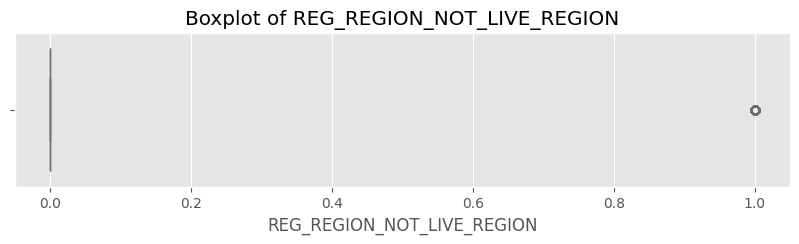

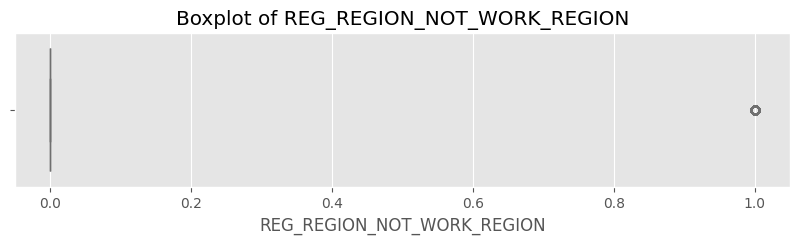

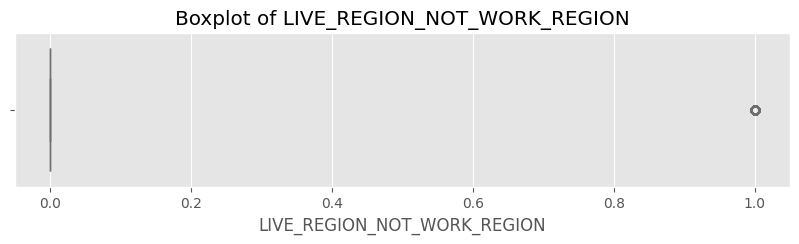

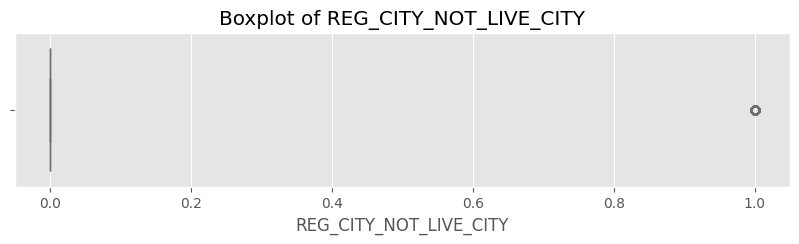

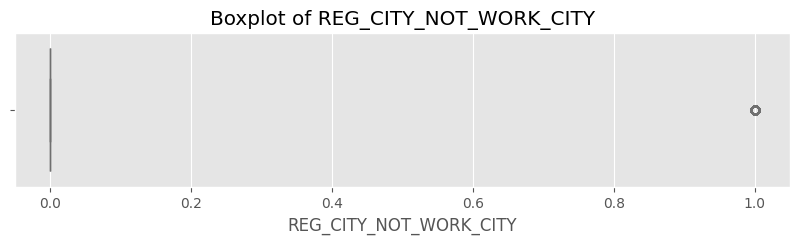

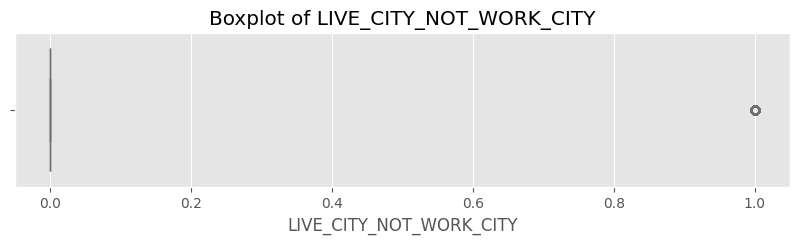

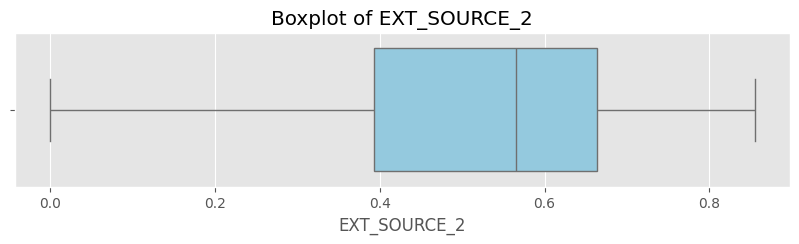

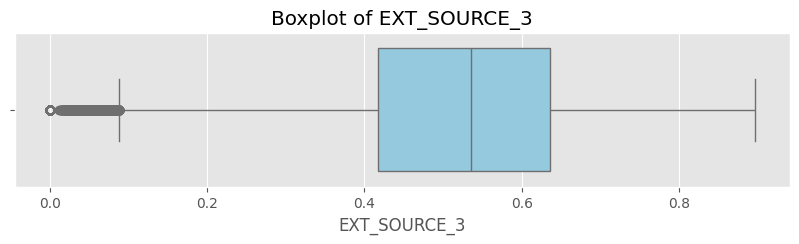

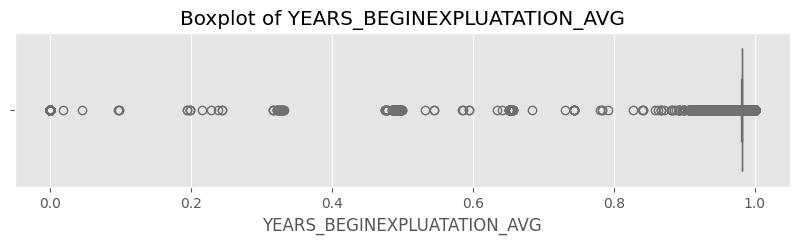

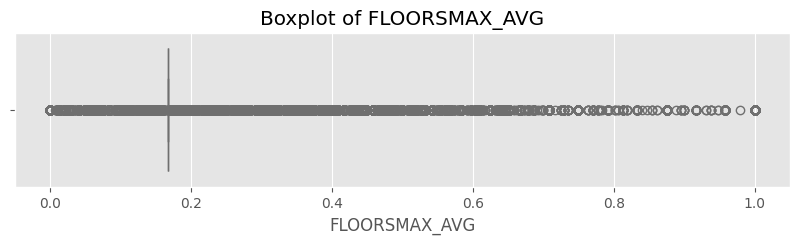

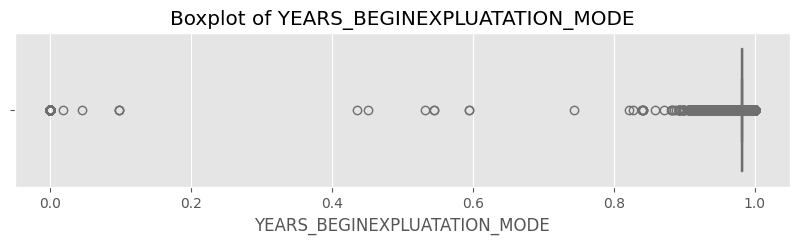

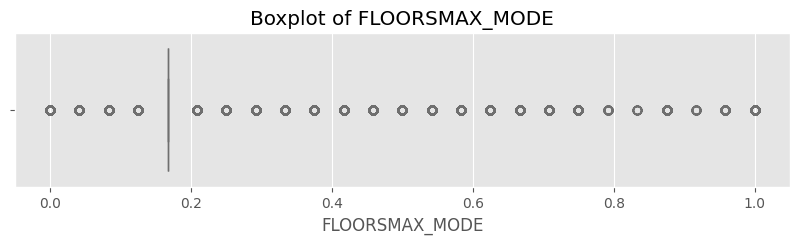

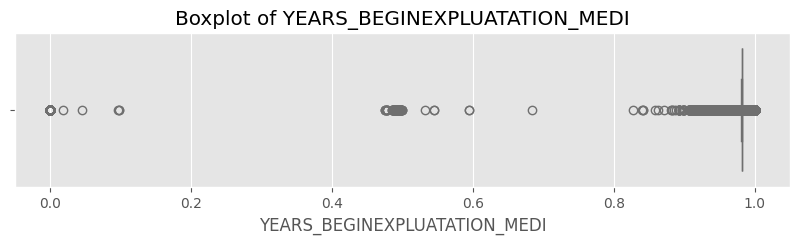

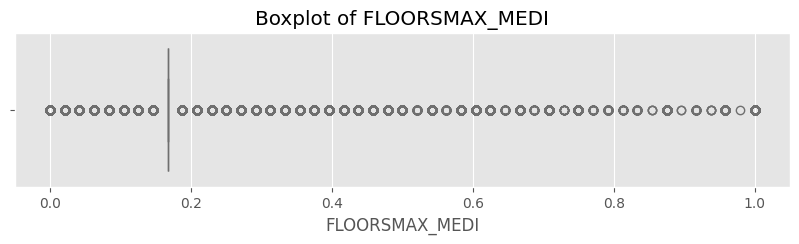

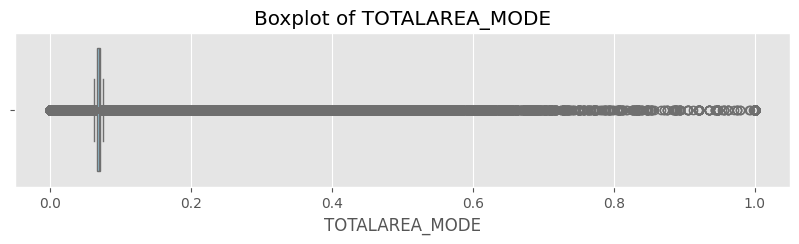

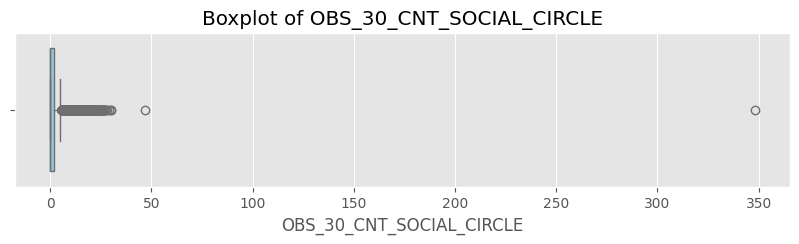

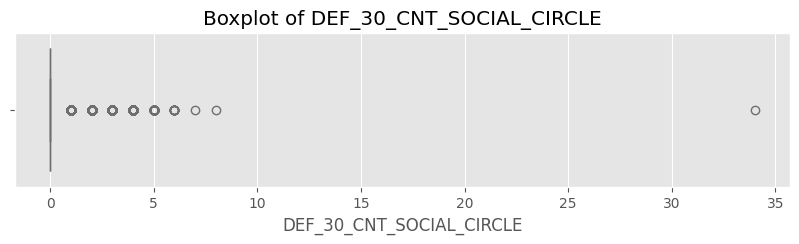

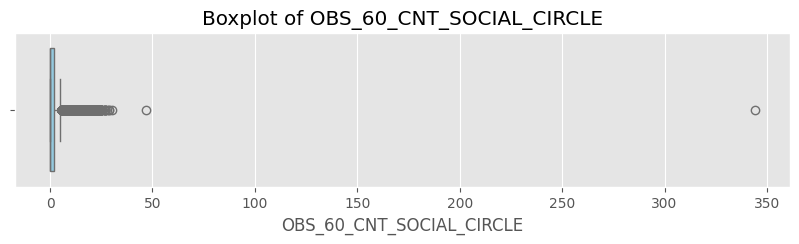

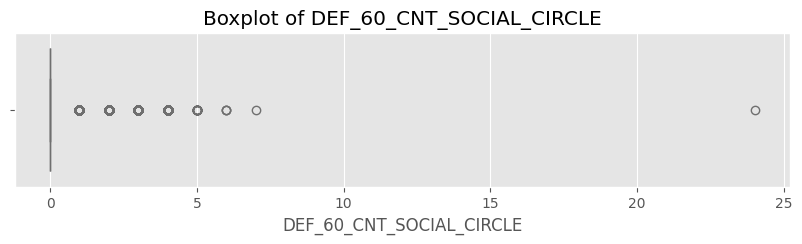

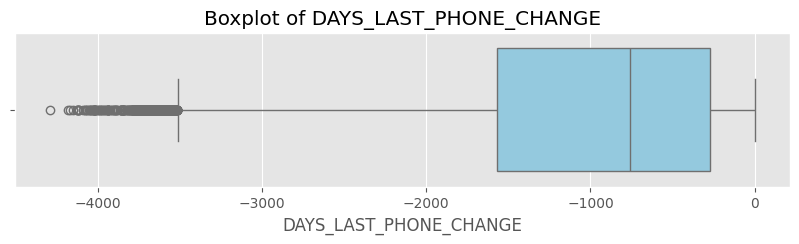

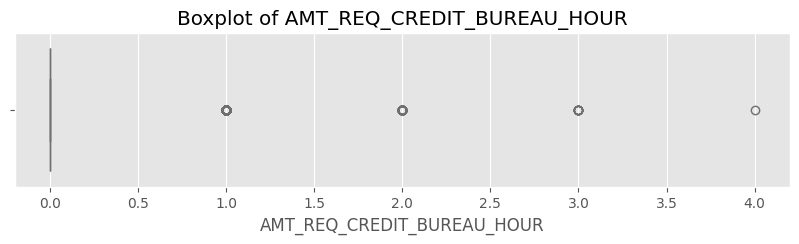

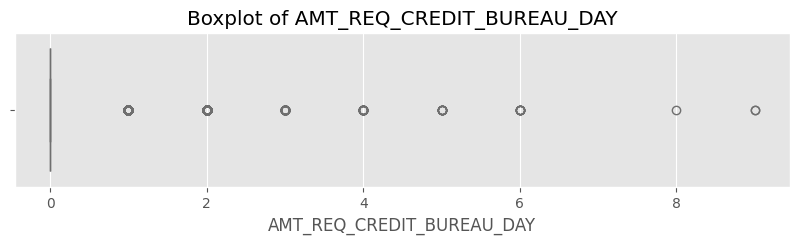

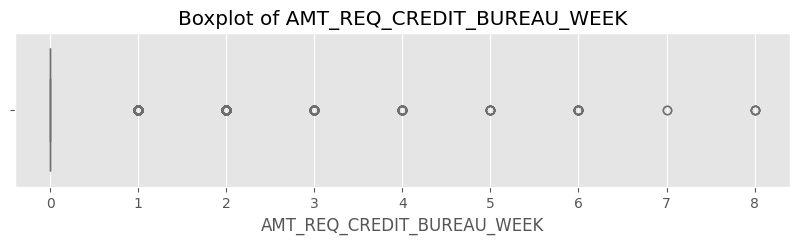

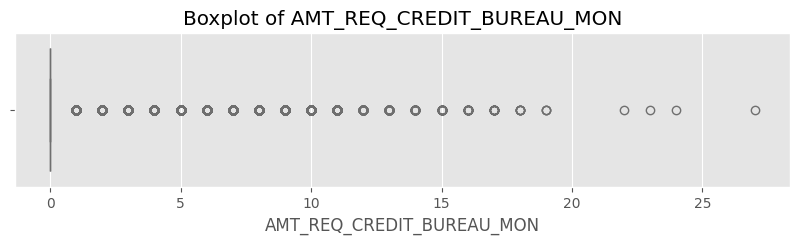

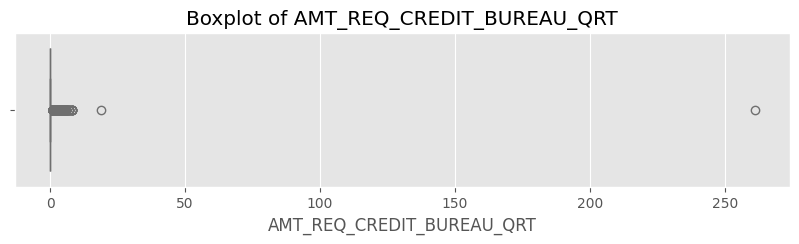

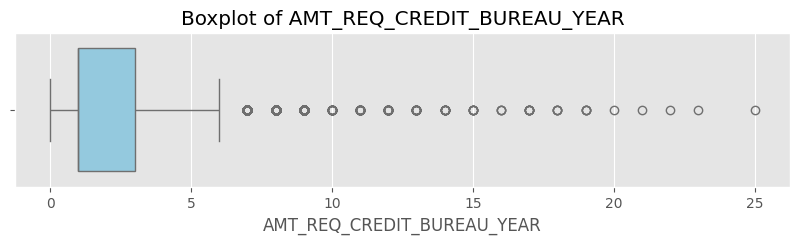

In [32]:
# Show boxplot to see outlier for each numerical features in datasets

for col in num_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=app_train_clean[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [33]:
# using IQR method to calculate the outliers from each numerical features in dataset

outlier_data = []

# Loop for each numerical features
for col in num_cols:
    Q1 = app_train_clean[col].quantile(0.25)
    Q3 = app_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = app_train_clean[(app_train_clean[col] < lower_bound) | (app_train_clean[col] > upper_bound)].shape[0]
    outlier_percent = (outlier_count / app_train_clean.shape[0]) * 100

    outlier_data.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': round(outlier_percent, 2)
    })

# create dataframe from list of dicts
outlier_summary = pd.DataFrame(outlier_data)

# sort the value
outlier_summary[outlier_summary['Outlier Count'] > 1].sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)

Feature  Outlier Count  Outlier Percentage
0   YEARS_BEGINEXPLUATATION_MEDI         142141               46.22
1    YEARS_BEGINEXPLUATATION_AVG         142016               46.18
2                 TOTALAREA_MODE         141917               46.15
3   YEARS_BEGINEXPLUATATION_MODE         141861               46.13
4                  FLOORSMAX_AVG          92616               30.12
5                 FLOORSMAX_MEDI          90884               29.55
6                 FLOORSMAX_MODE          88941               28.92
7           REGION_RATING_CLIENT          80527               26.19
8    REGION_RATING_CLIENT_W_CITY          78027               25.37
9                  DAYS_EMPLOYED          72217               23.48
10        REG_CITY_NOT_WORK_CITY          70867               23.05
11               FLAG_WORK_PHONE          61308               19.94
12                FLAG_EMP_PHONE          55386               18.01
13       LIVE_CITY_NOT_WORK_CITY          55215               17.96
14     AMT_REQ_CREDIT_BUREAU_QRT          50575               16.45
15     AMT_REQ_CREDIT_BUREAU_MON          43759               14.23
16      DEF_30_CNT_SOCIAL_CIRCLE          35166               11.44
17      DEF_60_CNT_SOCIAL_CIRCLE          25769                8.38
18                        TARGET          24825                8.07
19        REG_CITY_NOT_LIVE_CITY          24039                7.82
20      OBS_30_CNT_SOCIAL_CIRCLE          19971                6.49
21      OBS_60_CNT_SOCIAL_CIRCLE          19564                6.36
22                    FLAG_EMAIL          17442                5.67
23    REG_REGION_NOT_WORK_REGION          15612                5.08
24               AMT_GOODS_PRICE          14728                4.79
25              AMT_INCOME_TOTAL          14035                4.56
26   LIVE_REGION_NOT_WORK_REGION          12503                4.07
27    AMT_REQ_CREDIT_BUREAU_WEEK           8536                2.78
28    REGION_POPULATION_RELATIVE           8412                2.74
29                   AMT_ANNUITY           7504                2.44
30    AMT_REQ_CREDIT_BUREAU_YEAR           7233                2.35
31                    AMT_CREDIT           6562                2.13
32    REG_REGION_NOT_LIVE_REGION           4657                1.51
33                  EXT_SOURCE_3           4313                1.40
34                  CNT_CHILDREN           4272                1.39
35               CNT_FAM_MEMBERS           4007                1.30
36       HOUR_APPR_PROCESS_START           2257                0.73
37    AMT_REQ_CREDIT_BUREAU_HOUR           1626                0.53
38     AMT_REQ_CREDIT_BUREAU_DAY           1489                0.48
39             DAYS_REGISTRATION            659                0.21
40              FLAG_CONT_MOBILE            574                0.19
41        DAYS_LAST_PHONE_CHANGE            435                0.14

After using boxplots to see if there are outliers in the data, then calculations are carried out using the IQR method because the data generally has skewed values, based on the calculation results, there is data that has outliers, in this case, outliers will be left or will still be used to gain insight into the existing dataset.

In [34]:
for col in cat_cols:
    print(f"Kolom: {col}")
    print(f"Jumlah unique: {app_train_clean[col].nunique()}")
    print(f"Unique values: {app_train_clean[col].unique()}\n")

Kolom: NAME_CONTRACT_TYPE
Jumlah unique: 2
Unique values: ['Cash loans' 'Revolving loans']

Kolom: CODE_GENDER
Jumlah unique: 3
Unique values: ['M' 'F' 'XNA']

Kolom: FLAG_OWN_CAR
Jumlah unique: 2
Unique values: ['N' 'Y']

Kolom: FLAG_OWN_REALTY
Jumlah unique: 2
Unique values: ['Y' 'N']

Kolom: NAME_TYPE_SUITE
Jumlah unique: 7
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

Kolom: NAME_INCOME_TYPE
Jumlah unique: 8
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Kolom: NAME_EDUCATION_TYPE
Jumlah unique: 5
Unique values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Kolom: NAME_FAMILY_STATUS
Jumlah unique: 6
Unique values: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Kolom: NAME_HOUSING_TYPE
Jumlah unique: 6
Unique values: ['House / apart

In [ ]:
# export the dataset
app_train_clean.to_csv('application_train_clean.csv', index=False)

### **Bureau Dataset**

In [35]:
# check duplicated value/rows in dataset
bureau.duplicated().sum()

np.int64(0)

In [36]:
# check missing values in dataset
null_value = bureau.isna().sum().sort_values(ascending=False)
bureau_missing_value = pd.DataFrame({'null_value': null_value}).reset_index()
bureau_missing_value["percentage"] = bureau_missing_value["null_value"]/bureau.shape[0]*100
bureau_missing_value.columns = ["column_name", "null_value", "percentage"]
bureau_missing_value[bureau_missing_value["percentage"] > 50]

column_name  null_value  percentage
0             AMT_ANNUITY     1226791   71.473490
1  AMT_CREDIT_MAX_OVERDUE     1124488   65.513264

In [37]:
# drop column in bureau dataset

bureau_clean = drop_high_missing(bureau)
bureau_clean = bureau_clean.drop(columns=["SK_ID_BUREAU"])

In [38]:
rows, cols = bureau_clean.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 1716428 rows and 14 columns


The bureau dataset has 17 columns of which 2 have more than 50% missing values and SK_ID_BUREAU will not used in this case (will be dropped), after dropping the columns, 14 columns remain.

In [39]:
bureau_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_LIMIT    float64
 11  AMT_CREDIT_SUM_OVERDUE  float64
 12  CREDIT_TYPE             object 
 13  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 183.3+ MB


In [40]:
rows, cols = bureau_clean.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 1716428 rows and 14 columns


After the removal of columns that that unused and have a missing value greater than 50% and then the removal of columns that will not be used in the analysis process, the final remaining columns are 14 columns out of 17 columns.

In [41]:
null_value_after = bureau_clean.isna().sum().sort_values(ascending=False)
checking = pd.DataFrame({'null_value': null_value_after}).reset_index()
checking["percentage"] = checking["null_value"]/bureau_clean.shape[0]*100
checking.columns = ["column_name", "null_value", "percentage"]
checking[checking["percentage"] > 0]

column_name  null_value  percentage
0     DAYS_ENDDATE_FACT      633653   36.916958
1  AMT_CREDIT_SUM_LIMIT      591780   34.477415
2   AMT_CREDIT_SUM_DEBT      257669   15.011932
3   DAYS_CREDIT_ENDDATE      105553    6.149573
4        AMT_CREDIT_SUM          13    0.000757

There are several remaining columns that still have missing values, then the data will be filled with the average, median for numerical data, or mode for categorical, or even the missing data will be deleted.

In [42]:
bureau_clean.dtypes.value_counts()

float64    6
int64      5
object     3
Name: count, dtype: int64

In [43]:
cat_cols = bureau_clean.select_dtypes(include=['object']).columns.tolist()
num_cols = bureau_clean.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"There are {len(cat_cols)} categorical columns and {len(num_cols)} numerical columns")
print(f"This is the categorical columns: {cat_cols}")
print(f"This is the numerical columns: {num_cols}")

There are 3 categorical columns and 11 numerical columns
This is the categorical columns: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']
This is the numerical columns: ['SK_ID_CURR', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE']


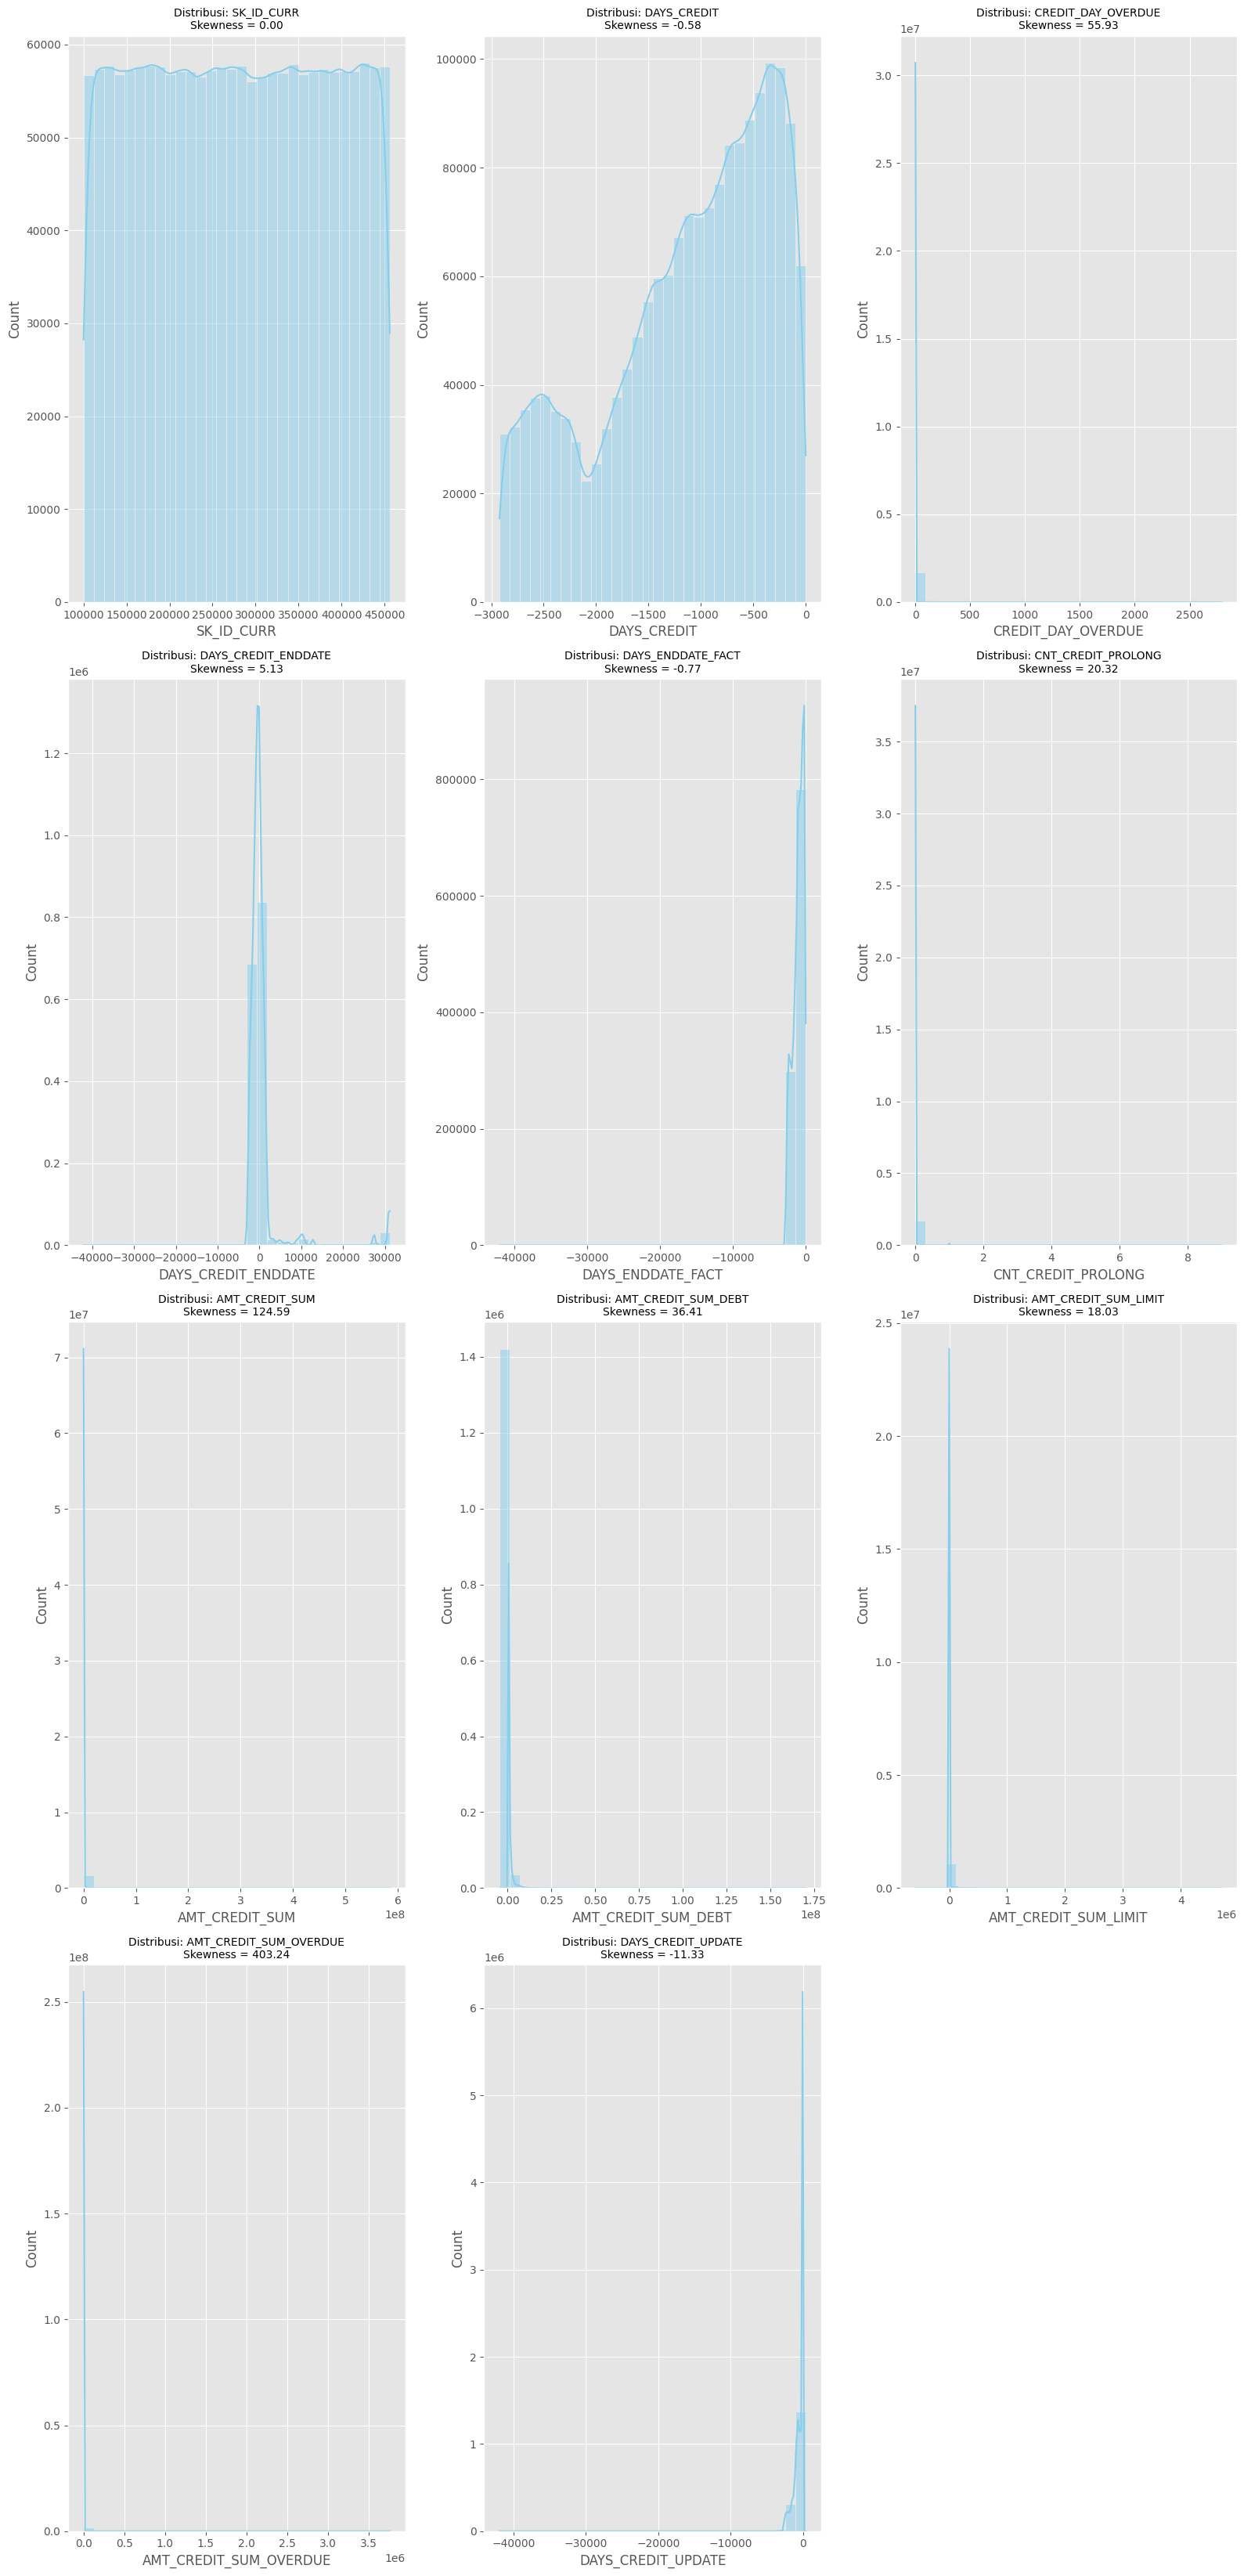

In [44]:
# Set size of plot
plt.figure(figsize=(16, len(num_cols)*3))

# Looping for each numerical columns and create that plot
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.histplot(bureau_clean[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}\nSkewness = {bureau_clean[col].skew():.2f}', fontsize=10)
    plt.tight_layout()

plt.show()

It can be seen that the distribution of features or numeric columns in the above-mentioned datasets are skewed, so the missing values in these features will be filled in by calculating the median for each feature.

In [45]:
for col in num_cols:
  if bureau_clean[col].isnull().any():
    bureau_clean[col] = bureau_clean[col].fillna(bureau_clean[col].median())

 And all missing values contained in categorical features in the dataset will be filled with the mode of each feature.

In [46]:
for col in cat_cols:
  if bureau_clean[col].isnull().any():
    bureau_clean[col] = bureau_clean[col].fillna(bureau_clean[col].mode()[0])

In [47]:
bureau_clean.isna().values.any()

np.False_

After the imputation process or filling in the value of each data that has missing values, the entire dataset can finally be said to be clean with no more missing values in the dataset.

In [48]:
bureau_clean.head()

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354        Closed      currency 1         -497                   0   
1      215354        Active      currency 1         -208                   0   
2      215354        Active      currency 1         -203                   0   
3      215354        Active      currency 1         -203                   0   
4      215354        Active      currency 1         -629                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0               -153.0             -153.0                   0         91323.0   
1               1075.0             -897.0                   0        225000.0   
2                528.0             -897.0                   0        464323.5   
3               -330.0             -897.0                   0         90000.0   
4               1197.0             -897.0                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   0.0                     0.0   
1             171342.0                   0.0                     0.0   
2                  0.0                   0.0                     0.0   
3                  0.0                   0.0                     0.0   
4                  0.0                   0.0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  
0  Consumer credit                -131  
1      Credit card                 -20  
2  Consumer credit                 -16  
3      Credit card                 -16  
4  Consumer credit                 -21

The next step is to look at the outliers contained in the numerical features in the dataset.

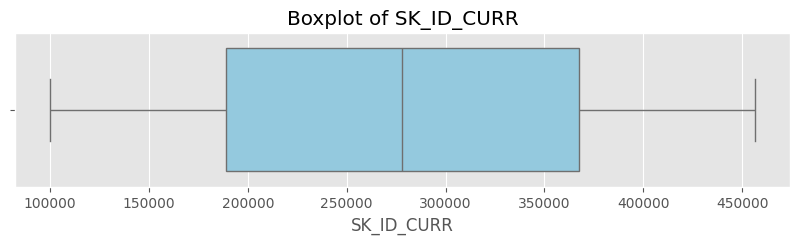

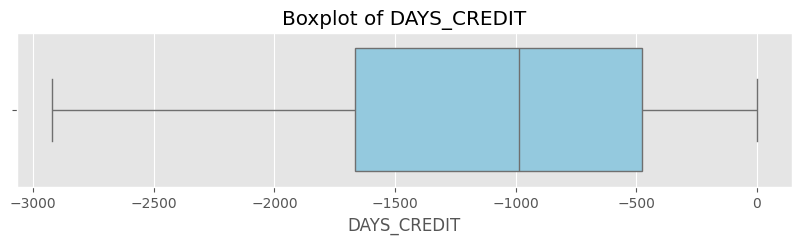

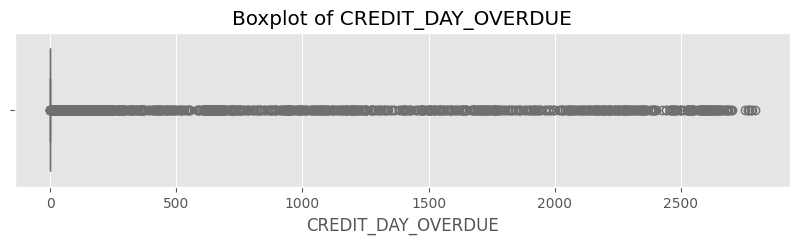

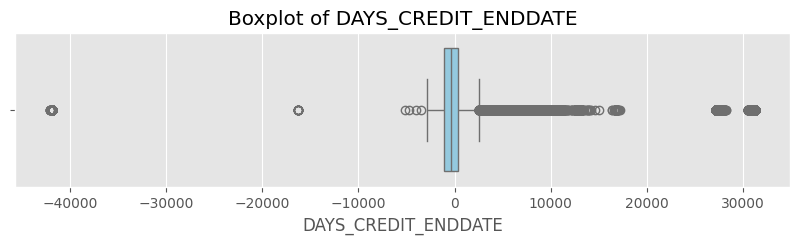

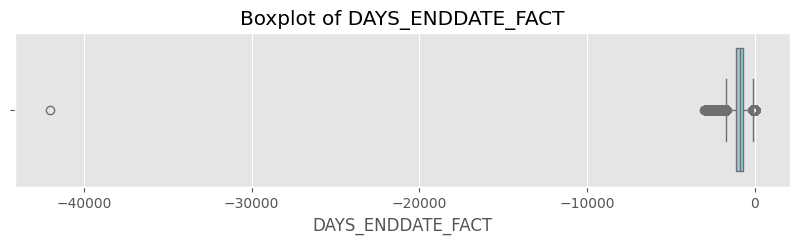

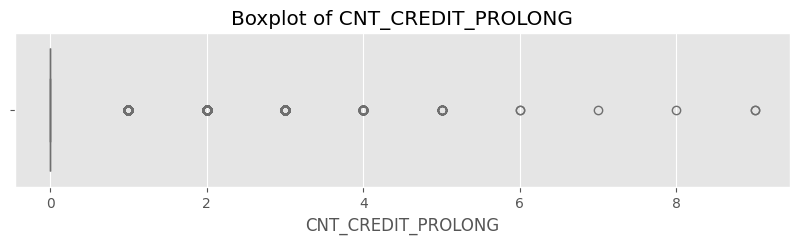

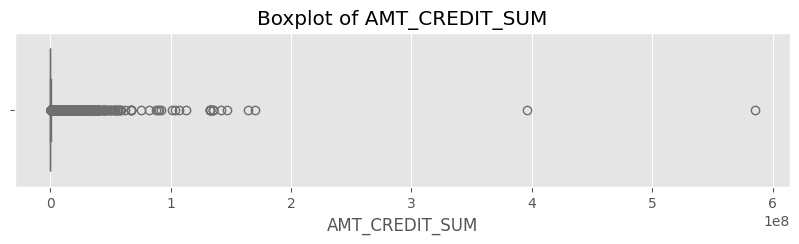

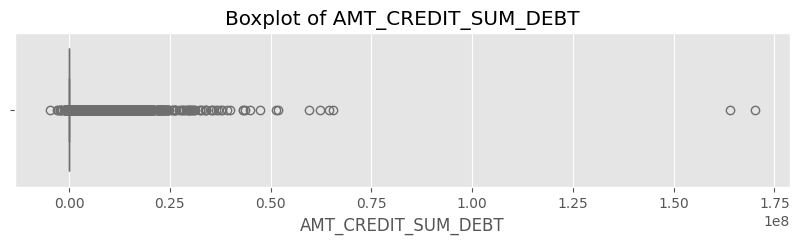

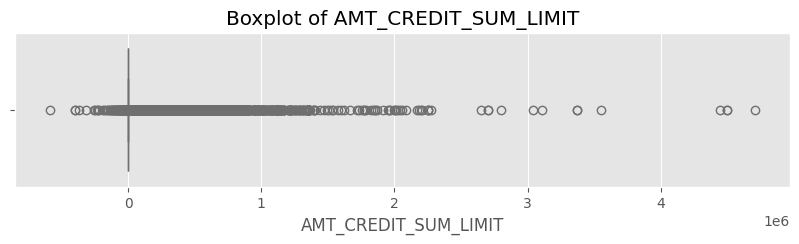

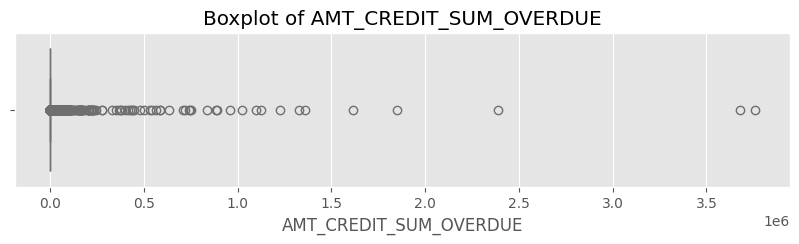

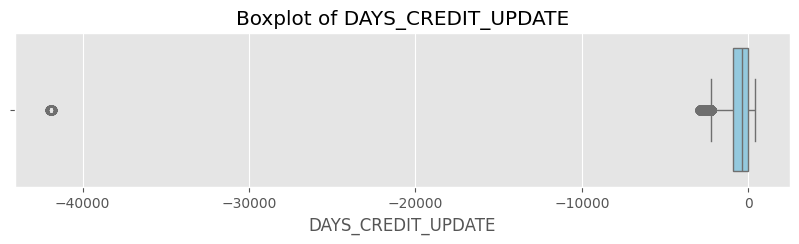

In [49]:
# Show boxplot to see outlier for each numerical features in datasets

for col in num_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=bureau_clean[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [50]:
# using IQR method to calculate the outliers from each numerical features in dataset

outlier_data = []

# Loop for each numerical features
for col in num_cols:
    Q1 = bureau_clean[col].quantile(0.25)
    Q3 = bureau_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = bureau_clean[(bureau_clean[col] < lower_bound) | (bureau_clean[col] > upper_bound)].shape[0]
    outlier_percent = (outlier_count / bureau_clean.shape[0]) * 100

    outlier_data.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': round(outlier_percent, 2)
    })

# create dataframe from list of dicts
outlier_summary = pd.DataFrame(outlier_data)

# sort the value
outlier_summary[outlier_summary['Outlier Count'] > 1].sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)

Feature  Outlier Count  Outlier Percentage
0     AMT_CREDIT_SUM_DEBT         426105               24.83
1       DAYS_ENDDATE_FACT         268117               15.62
2          AMT_CREDIT_SUM         187998               10.95
3     DAYS_CREDIT_ENDDATE          80891                4.71
4    AMT_CREDIT_SUM_LIMIT          74506                4.34
5      DAYS_CREDIT_UPDATE          63755                3.71
6      CNT_CREDIT_PROLONG           9114                0.53
7      CREDIT_DAY_OVERDUE           4217                0.25
8  AMT_CREDIT_SUM_OVERDUE           4158                0.24

After using boxplots to see if there are outliers in the data, then calculations are carried out using the IQR method because the data generally has skewed values, based on the calculation results, there is data that has outliers, in this case, outliers will be left or will still be used to gain insight into the existing dataset.

In [51]:
for col in cat_cols:
    print(f"Kolom: {col}")
    print(f"Jumlah unique: {bureau_clean[col].nunique()}")
    print(f"Unique values: {bureau_clean[col].unique()}\n")

Kolom: CREDIT_ACTIVE
Jumlah unique: 4
Unique values: ['Closed' 'Active' 'Sold' 'Bad debt']

Kolom: CREDIT_CURRENCY
Jumlah unique: 4
Unique values: ['currency 1' 'currency 2' 'currency 4' 'currency 3']

Kolom: CREDIT_TYPE
Jumlah unique: 15
Unique values: ['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']



In [52]:
bureau_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_LIMIT    float64
 11  AMT_CREDIT_SUM_OVERDUE  float64
 12  CREDIT_TYPE             object 
 13  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 183.3+ MB


After finishing cleaning the data, as we know the bureau dataset is a dimension table of the main dataset, namely application. Where the relationship between application and bureau is one to many, one SK_ID_CURR in the application dataset can be stored in several rows in the bureau dataset.

In [53]:
for col in cat_cols:
    unique_counts = bureau_clean.groupby('SK_ID_CURR')[col].nunique()

    print(f"Kolom: {col}")
    print("Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik:", (unique_counts > 1).sum())
    print("Contoh SK_ID_CURR dengan > 1 nilai:")
    print(unique_counts[unique_counts > 1].head())
    print("="*50)

Kolom: CREDIT_ACTIVE
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 215055
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100001    2
100002    2
100003    2
100005    2
100008    2
Name: CREDIT_ACTIVE, dtype: int64
Kolom: CREDIT_CURRENCY
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 1072
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100280    2
101769    2
102224    2
102509    2
102589    2
Name: CREDIT_CURRENCY, dtype: int64
Kolom: CREDIT_TYPE
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 196496
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100002    2
100003    2
100005    2
100009    2
100010    2
Name: CREDIT_TYPE, dtype: int64


In [54]:
# checking one SK_ID_CURR
sk_id = bureau.iloc[900]['SK_ID_CURR']

# Filter all the data if the SK_ID_CURR is same as sk_id
filtered_data = bureau.loc[bureau['SK_ID_CURR'] == sk_id]

# calculate the unique value for each categorical features when the value SK_ID_CURR is same as sk_id
for col in cat_cols:
    print(f"\nKolom: {col}")
    print("Jumlah unik:", filtered_data[col].nunique())
    print("Nilai unik:", filtered_data[col].unique())


Kolom: CREDIT_ACTIVE
Jumlah unik: 2
Nilai unik: ['Closed' 'Active']

Kolom: CREDIT_CURRENCY
Jumlah unik: 1
Nilai unik: ['currency 1']

Kolom: CREDIT_TYPE
Jumlah unik: 2
Nilai unik: ['Credit card' 'Consumer credit']


Based on experiments that have been carried out, for each SK_ID_CURR, especially on data features with categorical types, has a value of more than 1, this cannot be aggregated because the type is categorical, therefore this will be processed separately between numerical and categorical data features then the final results will be combined to get the final bureau dataset.

Therefore, the data in the bureau dataset will be grouped based on its SK_ID_CURR, by taking an aggregate calculation of taking min, max, mean, mode on features with numerical data types and taking mode on features with categorical data types for the next analysis process.

In [55]:
# select the numeric column in bureau clean dataset
bureau_numeric = bureau_clean.select_dtypes(include='number')

# aggregate the column by SK_ID_CURR
bureau_numeric_agg = bureau_numeric.groupby('SK_ID_CURR').agg('median').round(2).reset_index()

# set the column include "days" in their name into int type
days_columns = [col for col in bureau_numeric_agg.columns if "DAYS" in col]
bureau_numeric_agg[days_columns] = bureau_numeric_agg[days_columns].astype(int)

bureau_numeric_agg

SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0           100001         -857                 0.0                 -179   
1           100002        -1042                 0.0                 -330   
2           100003        -1205                 0.0                 -480   
3           100004         -867                 0.0                 -488   
4           100005         -137                 0.0                  122   
...            ...          ...                 ...                  ...   
305806      456249        -1680                 0.0                -1181   
305807      456250         -824                 0.0                 1797   
305808      456253         -919                 0.0                   99   
305809      456254        -1104                 0.0                 -859   
305810      456255        -1020                 0.0                  315   

        DAYS_ENDDATE_FACT  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                    -897                 0.0       168345.00   
1                    -904                 0.0        54130.50   
2                    -759                 0.0        92576.25   
3                    -532                 0.0        94518.90   
4                    -897                 0.0        58500.00   
...                   ...                 ...             ...   
305806              -1240                 0.0       248692.50   
305807               -897                 0.0       483349.50   
305808               -845                 0.0       675000.00   
305809               -859                 0.0        45000.00   
305810               -897                 0.0       436032.00   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                      0.00                   0.0                     0.0   
1                      0.00                   0.0                     0.0   
2                      0.00                   0.0                     0.0   
3                      0.00                   0.0                     0.0   
4                  25321.50                   0.0                     0.0   
...                     ...                   ...                     ...   
305806                 0.00                   0.0                     0.0   
305807            391731.62                   0.0                     0.0   
305808             85518.00                   0.0                     0.0   
305809                 0.00                   0.0                     0.0   
305810                 0.00                   0.0                     0.0   

        DAYS_CREDIT_UPDATE  
0                     -155  
1                     -402  
2                     -545  
3                     -532  
4                      -31  
...                    ...  
305806                -909  
305807                 -31  
305808                -153  
305809                -401  
305810                -700  

[305811 rows x 11 columns]

In [56]:
# select the SK_ID_CURR and all categorical columns
bureau_cat = bureau_clean[['SK_ID_CURR'] + cat_cols]
bureau_cat

# get the mode for each categorical column, and group by SK_ID_CURR
bureau_cat_mode = bureau_cat.groupby('SK_ID_CURR').agg(lambda x: x.mode().iloc[0]).reset_index()
bureau_cat_mode

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE
0           100001        Closed      currency 1  Consumer credit
1           100002        Closed      currency 1  Consumer credit
2           100003        Closed      currency 1  Consumer credit
3           100004        Closed      currency 1  Consumer credit
4           100005        Active      currency 1  Consumer credit
...            ...           ...             ...              ...
305806      456249        Closed      currency 1  Consumer credit
305807      456250        Active      currency 1  Consumer credit
305808      456253        Active      currency 1  Consumer credit
305809      456254        Closed      currency 1  Consumer credit
305810      456255        Closed      currency 1  Consumer credit

[305811 rows x 4 columns]

In [57]:
# merge the bureau numerical and categorical aggregation to get the final bureau dataset
bureau_final = bureau_numeric_agg.merge(bureau_cat_mode, on='SK_ID_CURR', how='left')
bureau_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              305811 non-null  int64  
 1   DAYS_CREDIT             305811 non-null  int64  
 2   CREDIT_DAY_OVERDUE      305811 non-null  float64
 3   DAYS_CREDIT_ENDDATE     305811 non-null  int64  
 4   DAYS_ENDDATE_FACT       305811 non-null  int64  
 5   CNT_CREDIT_PROLONG      305811 non-null  float64
 6   AMT_CREDIT_SUM          305811 non-null  float64
 7   AMT_CREDIT_SUM_DEBT     305811 non-null  float64
 8   AMT_CREDIT_SUM_LIMIT    305811 non-null  float64
 9   AMT_CREDIT_SUM_OVERDUE  305811 non-null  float64
 10  DAYS_CREDIT_UPDATE      305811 non-null  int64  
 11  CREDIT_ACTIVE           305811 non-null  object 
 12  CREDIT_CURRENCY         305811 non-null  object 
 13  CREDIT_TYPE             305811 non-null  object 
dtypes: float64(6), int64

In [58]:
bureau_final.isna().sum().any()

np.False_

In [59]:
bureau_final = bureau_final.add_prefix('BUREAU_')
bureau_final.rename(columns={'BUREAU_SK_ID_CURR': 'SK_ID_CURR'}, inplace=True)

In [60]:
bureau_final.head()

SK_ID_CURR  BUREAU_DAYS_CREDIT  BUREAU_CREDIT_DAY_OVERDUE  \
0      100001                -857                        0.0   
1      100002               -1042                        0.0   
2      100003               -1205                        0.0   
3      100004                -867                        0.0   
4      100005                -137                        0.0   

   BUREAU_DAYS_CREDIT_ENDDATE  BUREAU_DAYS_ENDDATE_FACT  \
0                        -179                      -897   
1                        -330                      -904   
2                        -480                      -759   
3                        -488                      -532   
4                         122                      -897   

   BUREAU_CNT_CREDIT_PROLONG  BUREAU_AMT_CREDIT_SUM  \
0                        0.0              168345.00   
1                        0.0               54130.50   
2                        0.0               92576.25   
3                        0.0               94518.90   
4                        0.0               58500.00   

   BUREAU_AMT_CREDIT_SUM_DEBT  BUREAU_AMT_CREDIT_SUM_LIMIT  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                     25321.5                          0.0   

   BUREAU_AMT_CREDIT_SUM_OVERDUE  BUREAU_DAYS_CREDIT_UPDATE  \
0                            0.0                       -155   
1                            0.0                       -402   
2                            0.0                       -545   
3                            0.0                       -532   
4                            0.0                        -31   

  BUREAU_CREDIT_ACTIVE BUREAU_CREDIT_CURRENCY BUREAU_CREDIT_TYPE  
0               Closed             currency 1    Consumer credit  
1               Closed             currency 1    Consumer credit  
2               Closed             currency 1    Consumer credit  
3               Closed             currency 1    Consumer credit  
4               Active             currency 1    Consumer credit

In [104]:
# export to csv
bureau_final.to_csv('bureau_clean.csv', index=False)

### **Previous Application**

In [61]:
# check duplicated value/rows in dataset
prev_app.duplicated().sum()

np.int64(0)

In [62]:
# check missing values in dataset
null_value = prev_app.isna().sum().sort_values(ascending=False)
bureau_missing_value = pd.DataFrame({'null_value': null_value}).reset_index()
bureau_missing_value["percentage"] = bureau_missing_value["null_value"]/prev_app.shape[0]*100
bureau_missing_value.columns = ["column_name", "null_value", "percentage"]
bureau_missing_value[bureau_missing_value["percentage"] > 50]

column_name  null_value  percentage
0  RATE_INTEREST_PRIVILEGED     1664263   99.643698
1     RATE_INTEREST_PRIMARY     1664263   99.643698
2          AMT_DOWN_PAYMENT      895844   53.636480
3         RATE_DOWN_PAYMENT      895844   53.636480

In [63]:
# drop column in previous aplication dataset

prev_app_clean = drop_high_missing(prev_app)
prev_app_clean = prev_app_clean.drop(columns=["SK_ID_PREV"])

In [64]:
rows, cols = prev_app_clean.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 1670214 rows and 32 columns


The previous application dataset has __ columns of which __ have more than 50% missing values and SK_ID_PREV will not used in this case (will be dropped), after dropping the columns, __ columns remain.

In [65]:
prev_app_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_GOODS_PRICE              1284699 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 7   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 10  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

In [66]:
rows, cols = prev_app_clean.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 1670214 rows and 32 columns


After the removal of columns that that unused and have a missing value greater than 50% and then the removal of columns that will not be used in the analysis process, the final remaining columns are __ columns out of __ columns.

In [67]:
null_value_after = prev_app_clean.isna().sum().sort_values(ascending=False)
checking = pd.DataFrame({'null_value': null_value_after}).reset_index()
checking["percentage"] = checking["null_value"]/prev_app_clean.shape[0]*100
checking.columns = ["column_name", "null_value", "percentage"]
checking[checking["percentage"] > 0]

column_name  null_value  percentage
0             NAME_TYPE_SUITE      820405   49.119754
1   NFLAG_INSURED_ON_APPROVAL      673065   40.298129
2              DAYS_FIRST_DUE      673065   40.298129
3          DAYS_FIRST_DRAWING      673065   40.298129
4            DAYS_TERMINATION      673065   40.298129
5   DAYS_LAST_DUE_1ST_VERSION      673065   40.298129
6               DAYS_LAST_DUE      673065   40.298129
7             AMT_GOODS_PRICE      385515   23.081773
8                 AMT_ANNUITY      372235   22.286665
9                 CNT_PAYMENT      372230   22.286366
10        PRODUCT_COMBINATION         346    0.020716
11                 AMT_CREDIT           1    0.000060

There are several remaining columns that still have missing values, then the data will be filled with the average, median for numerical data, or mode for categorical, or even the missing data will be deleted.

In [68]:
prev_app_clean.dtypes.value_counts()

object     16
float64    11
int64       5
Name: count, dtype: int64

In [69]:
cat_cols = prev_app_clean.select_dtypes(include=['object']).columns.tolist()
num_cols = prev_app_clean.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"There are {len(cat_cols)} categorical columns and {len(num_cols)} numerical columns")
print(f"This is the categorical columns: {cat_cols}")
print(f"This is the numerical columns: {num_cols}")

There are 16 categorical columns and 16 numerical columns
This is the categorical columns: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
This is the numerical columns: ['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


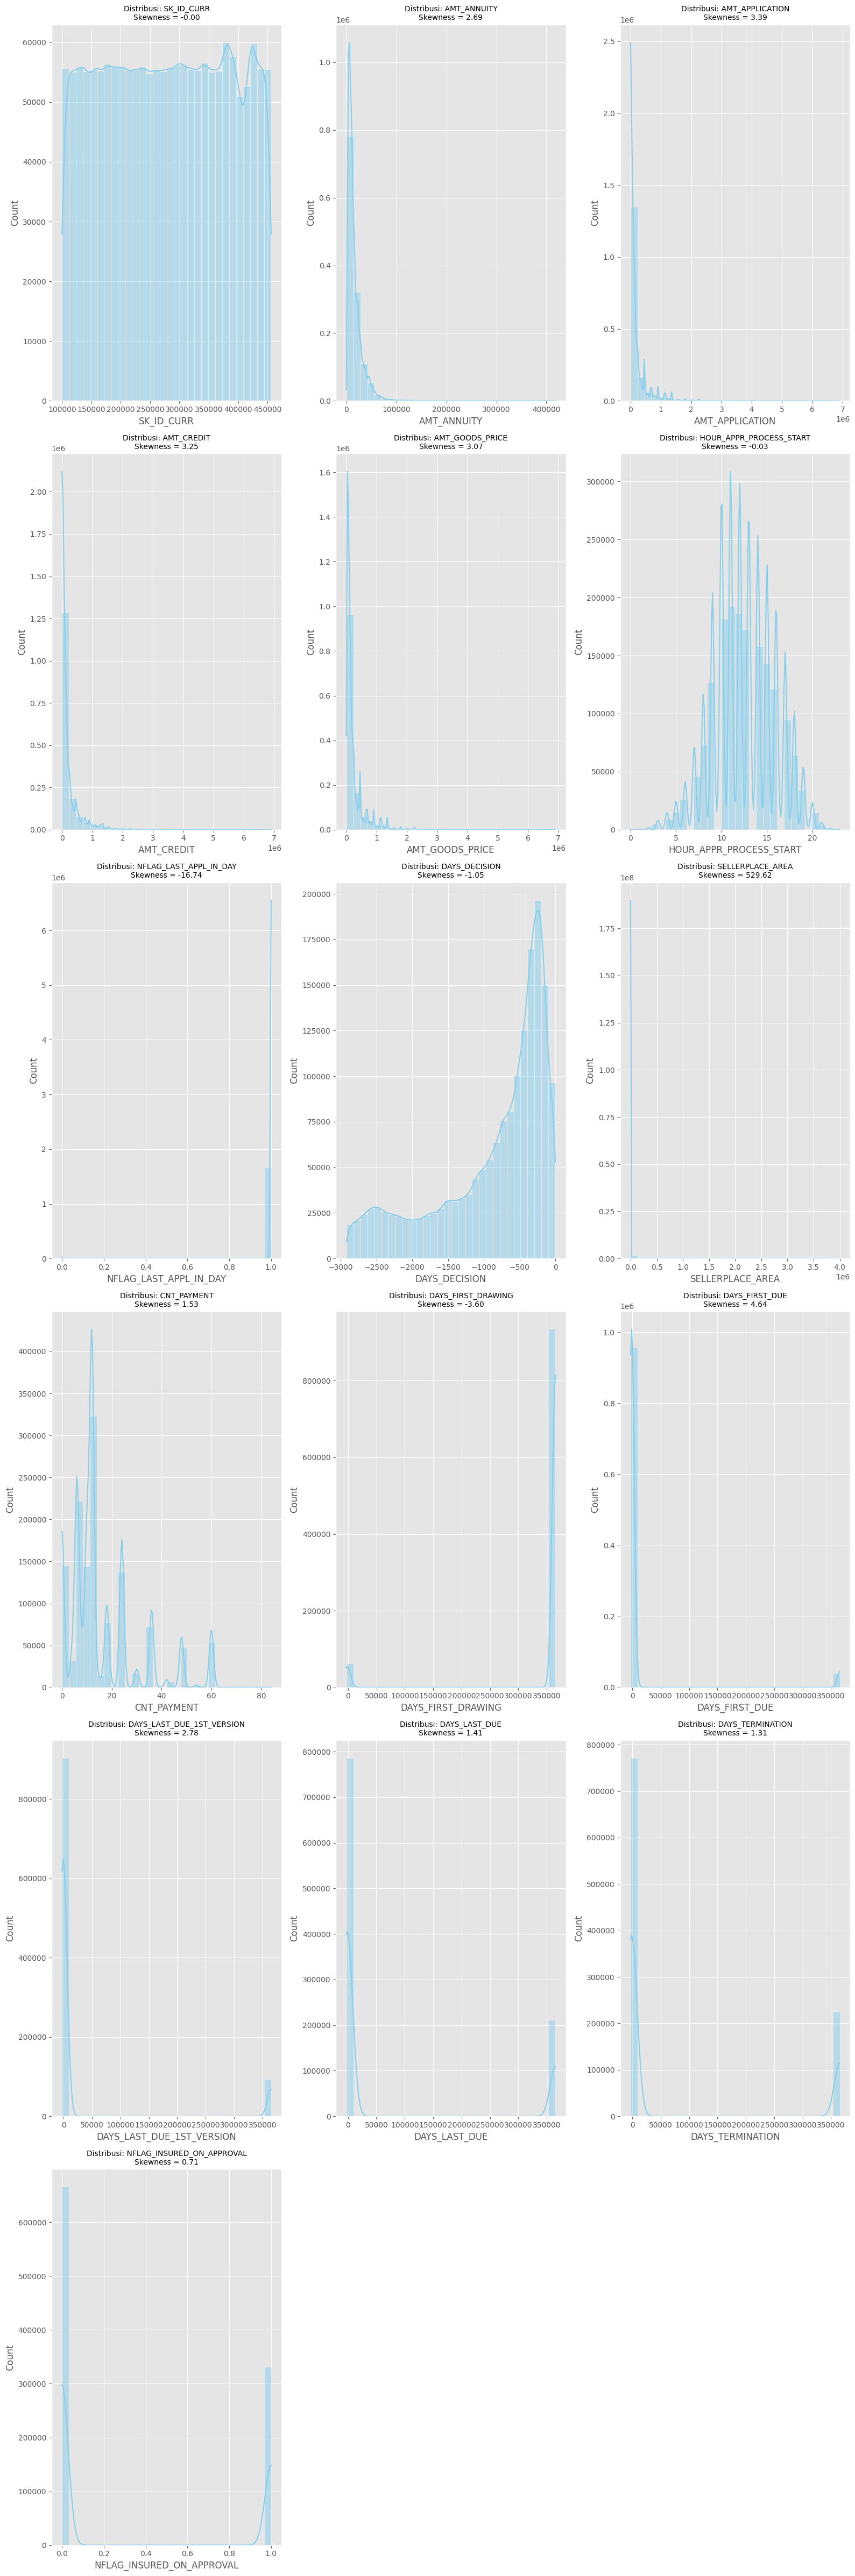

In [70]:
# Set size of plot
plt.figure(figsize=(16, len(num_cols)*3))

# Looping for each numerical columns and create that plot
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.histplot(prev_app_clean[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}\nSkewness = {prev_app_clean[col].skew():.2f}', fontsize=10)
    plt.tight_layout()

plt.show()

It can be seen that the distribution of features or numeric columns in the above-mentioned datasets are skewed, so the missing values in these features will be filled in by calculating the median for each feature.

In [71]:
for col in num_cols:
  if prev_app_clean[col].isnull().any():
    prev_app_clean[col] = prev_app_clean[col].fillna(prev_app_clean[col].median())

 And all missing values contained in categorical features in the dataset will be filled with the mode of each feature.

In [72]:
for col in cat_cols:
  if prev_app_clean[col].isnull().any():
    prev_app_clean[col] = prev_app_clean[col].fillna(prev_app_clean[col].mode()[0])

In [73]:
prev_app_clean.isna().values.any()

np.False_

After the imputation process or filling in the value of each data that has missing values, the entire dataset can finally be said to be clean with no more missing values in the dataset.

In [74]:
prev_app_clean.head()

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      271877     Consumer loans     1730.430          17145.0     17145.0   
1      108129         Cash loans    25188.615         607500.0    679671.0   
2      122040         Cash loans    15060.735         112500.0    136444.5   
3      176158         Cash loans    47041.335         450000.0    470790.0   
4      202054         Cash loans    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0          17145.0                   SATURDAY                       15   
1         607500.0                   THURSDAY                       11   
2         112500.0                    TUESDAY                       11   
3         450000.0                     MONDAY                        7   
4         337500.0                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP    Unaccompanied         Repeater              Mobile   
1                XAP    Unaccompanied         Repeater                 XNA   
2                XAP  Spouse, partner         Repeater                 XNA   
3                XAP    Unaccompanied         Repeater                 XNA   
4                 HC    Unaccompanied         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA             Country-wide                35   
1           Cash            x-sell           Contact center                -1   
2           Cash            x-sell  Credit and cash offices                -1   
3           Cash            x-sell  Credit and cash offices                -1   
4           Cash           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1                  XNA         36.0       low_action   
2                  XNA         12.0             high   
3                  XNA         12.0           middle   
4                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2         Cash X-Sell: high            365243.0          -271.0   
3       Cash X-Sell: middle            365243.0          -482.0   
4         Cash Street: high            365243.0          -831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0          -42.0             -37.0   
1                      916.0       365243.0          365243.0   
2                       59.0       365243.0          365243.0   
3                     -152.0         -182.0            -177.0   
4                     -361.0         -537.0            -499.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3           

The next step is to look at the outliers contained in the numerical features in the dataset.

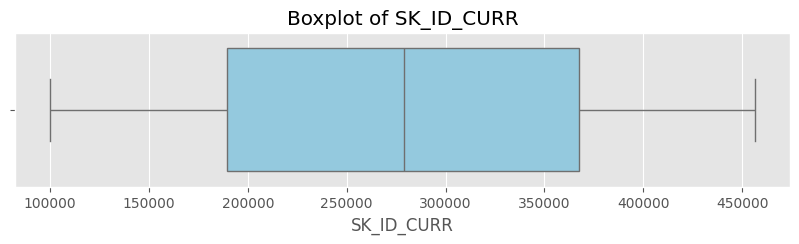

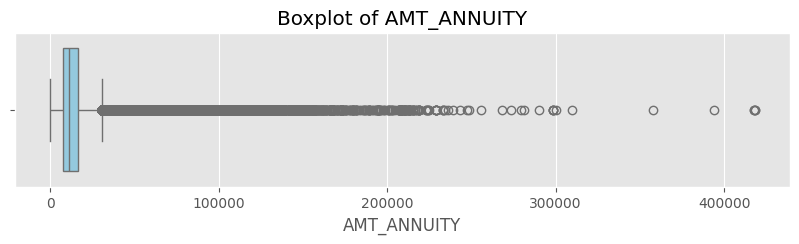

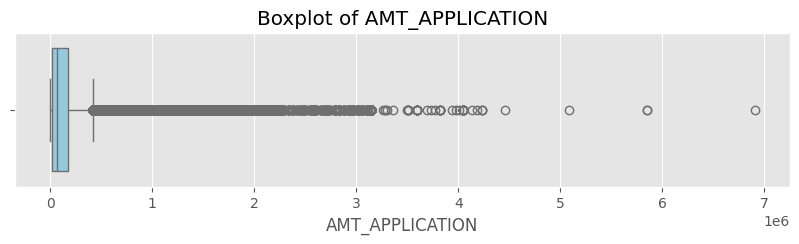

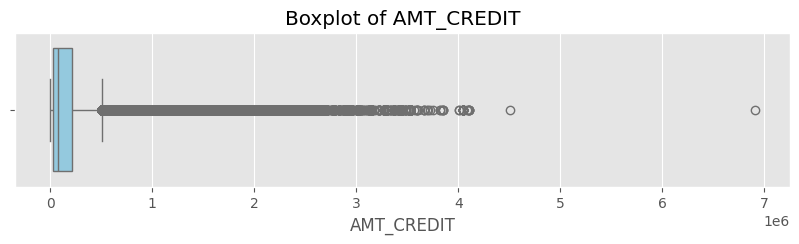

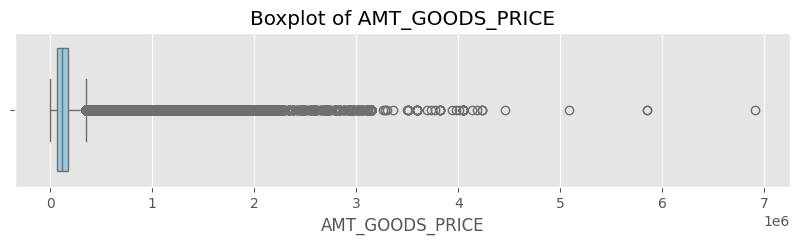

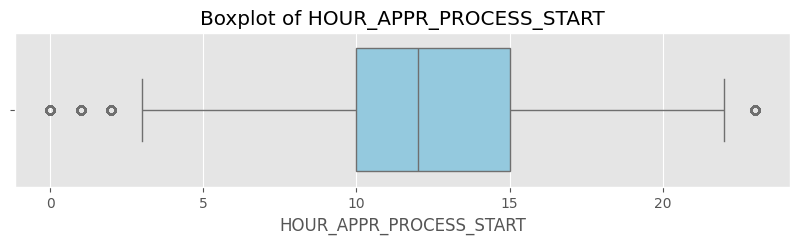

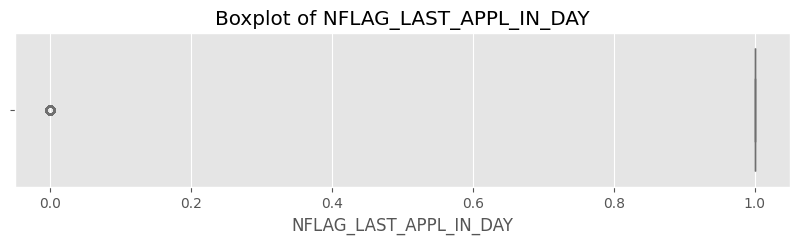

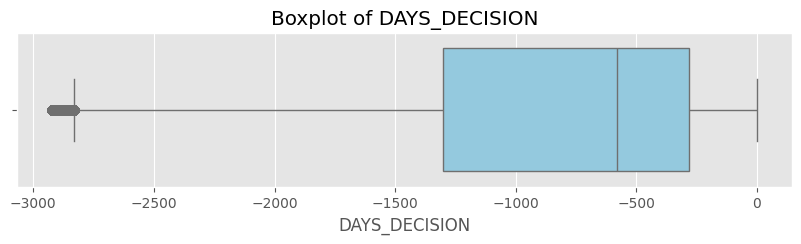

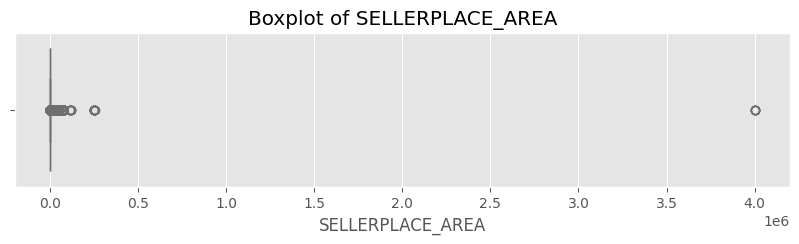

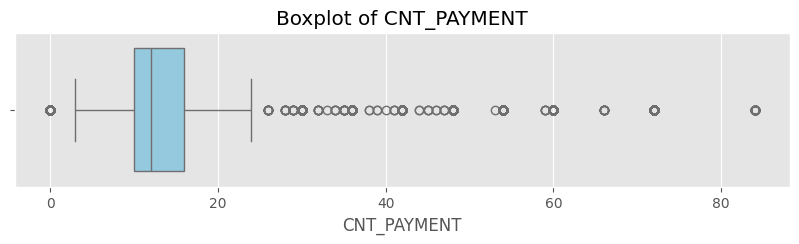

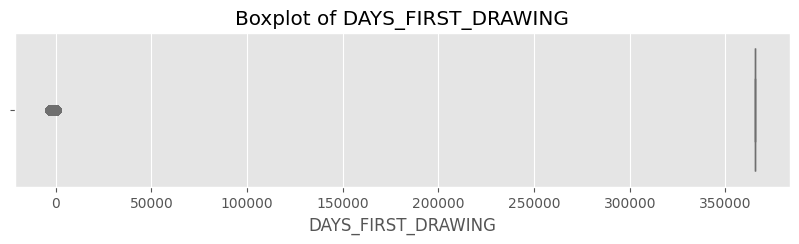

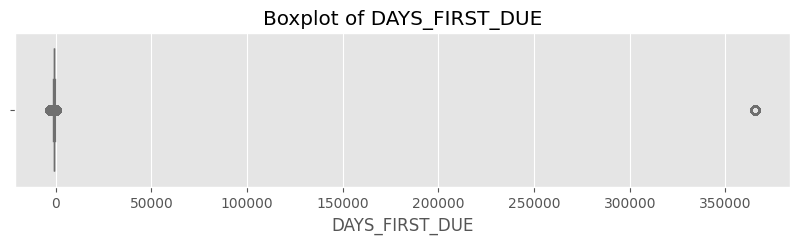

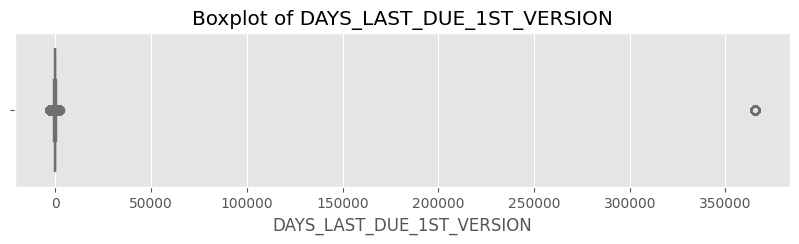

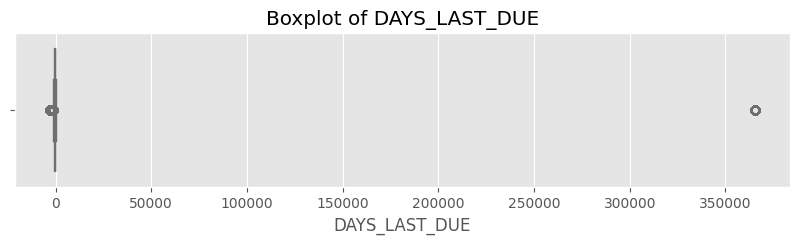

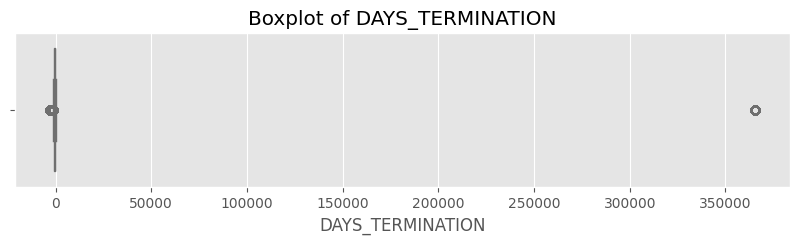

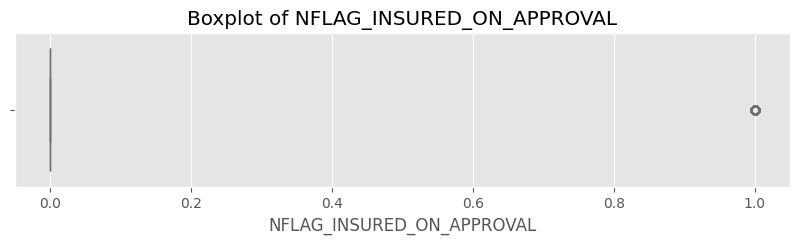

In [75]:
# Show boxplot to see outlier for each numerical features in datasets

for col in num_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=prev_app_clean[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [76]:
# using IQR method to calculate the outliers from each numerical features in dataset

outlier_data = []

# Loop for each numerical features
for col in num_cols:
    Q1 = prev_app_clean[col].quantile(0.25)
    Q3 = prev_app_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = prev_app_clean[(prev_app_clean[col] < lower_bound) | (prev_app_clean[col] > upper_bound)].shape[0]
    outlier_percent = (outlier_count / prev_app_clean.shape[0]) * 100

    outlier_data.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': round(outlier_percent, 2)
    })

# create dataframe from list of dicts
outlier_summary = pd.DataFrame(outlier_data)

# sort the value
outlier_summary[outlier_summary['Outlier Count'] > 1].sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)

Feature  Outlier Count  Outlier Percentage
0            DAYS_TERMINATION         482992               28.92
1               DAYS_LAST_DUE         468436               28.05
2   DAYS_LAST_DUE_1ST_VERSION         431364               25.83
3              DAYS_FIRST_DUE         374760               22.44
4                 CNT_PAYMENT         344916               20.65
5   NFLAG_INSURED_ON_APPROVAL         331622               19.86
6            SELLERPLACE_AREA         268087               16.05
7             AMT_GOODS_PRICE         236035               14.13
8             AMT_APPLICATION         208019               12.45
9                  AMT_CREDIT         179989               10.78
10                AMT_ANNUITY         162620                9.74
11         DAYS_FIRST_DRAWING          62705                3.75
12              DAYS_DECISION          17571                1.05
13     NFLAG_LAST_APPL_IN_DAY           5900                0.35
14    HOUR_APPR_PROCESS_START           1639                0.10

After using boxplots to see if there are outliers in the data, then calculations are carried out using the IQR method because the data generally has skewed values, based on the calculation results, there is data that has outliers, in this case, outliers will be left or will still be used to gain insight into the existing dataset.

In [77]:
for col in cat_cols:
    print(f"Kolom: {col}")
    print(f"Jumlah unique: {prev_app_clean[col].nunique()}")
    print(f"Unique values: {prev_app_clean[col].unique()}\n")

Kolom: NAME_CONTRACT_TYPE
Jumlah unique: 4
Unique values: ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']

Kolom: WEEKDAY_APPR_PROCESS_START
Jumlah unique: 7
Unique values: ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']

Kolom: FLAG_LAST_APPL_PER_CONTRACT
Jumlah unique: 2
Unique values: ['Y' 'N']

Kolom: NAME_CASH_LOAN_PURPOSE
Jumlah unique: 25
Unique values: ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']

Kolom: NAME_CONTRACT_STATUS
Jumlah unique: 4
Unique values: ['Approved' 'Refused' 'Canceled' 'Unused offer']

Kolom: NAME_PAYMENT_TY

In [78]:
prev_app_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1670214 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670214 non-null  float64
 5   AMT_GOODS_PRICE              1670214 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 7   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 10  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

After finishing cleaning the data, as we know the bureau dataset is a dimension table of the main dataset, namely application. Where the relationship between application and bureau is one to many, one SK_ID_CURR in the application dataset can be stored in several rows in the bureau dataset.

In [79]:
for col in cat_cols:
    unique_counts = prev_app_clean.groupby('SK_ID_CURR')[col].nunique()

    print(f"Kolom: {col}")
    print("Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik:", (unique_counts > 1).sum())
    print("Contoh SK_ID_CURR dengan > 1 nilai:")
    print(unique_counts[unique_counts > 1].head())
    print("="*50)

Kolom: NAME_CONTRACT_TYPE
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 214128
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100003    2
100005    2
100006    3
100007    2
100008    2
Name: NAME_CONTRACT_TYPE, dtype: int64
Kolom: WEEKDAY_APPR_PROCESS_START
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 259747
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100003    3
100005    2
100006    4
100007    5
100008    3
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Kolom: FLAG_LAST_APPL_PER_CONTRACT
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 5852
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100059    2
100091    2
100113    2
100135    2
100239    2
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
Kolom: NAME_CASH_LOAN_PURPOSE
Jumlah SK_ID_CURR dengan lebih dari 1 nilai unik: 191312
Contoh SK_ID_CURR dengan > 1 nilai:
SK_ID_CURR
100003    2
100005    2
100006    2
100007    2
100008    2
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64
Kolom: NAME_CONTRACT_STATUS
Jumlah SK_ID_CUR

In [80]:
# checking one SK_ID_CURR
sk_id = prev_app_clean.iloc[900]['SK_ID_CURR']

# Filter all the data if the SK_ID_CURR is same as sk_id
filtered_data = prev_app_clean.loc[prev_app_clean['SK_ID_CURR'] == sk_id]

# calculate the unique value for each categorical features when the value SK_ID_CURR is same as sk_id
for col in cat_cols:
    print(f"\nKolom: {col}")
    print("Jumlah unik:", filtered_data[col].nunique())
    print("Nilai unik:", filtered_data[col].unique())


Kolom: NAME_CONTRACT_TYPE
Jumlah unik: 2
Nilai unik: ['Revolving loans' 'Consumer loans']

Kolom: WEEKDAY_APPR_PROCESS_START
Jumlah unik: 1
Nilai unik: ['SUNDAY']

Kolom: FLAG_LAST_APPL_PER_CONTRACT
Jumlah unik: 1
Nilai unik: ['Y']

Kolom: NAME_CASH_LOAN_PURPOSE
Jumlah unik: 1
Nilai unik: ['XAP']

Kolom: NAME_CONTRACT_STATUS
Jumlah unik: 1
Nilai unik: ['Approved']

Kolom: NAME_PAYMENT_TYPE
Jumlah unik: 2
Nilai unik: ['XNA' 'Cash through the bank']

Kolom: CODE_REJECT_REASON
Jumlah unik: 1
Nilai unik: ['XAP']

Kolom: NAME_TYPE_SUITE
Jumlah unik: 1
Nilai unik: ['Unaccompanied']

Kolom: NAME_CLIENT_TYPE
Jumlah unik: 1
Nilai unik: ['New']

Kolom: NAME_GOODS_CATEGORY
Jumlah unik: 2
Nilai unik: ['XNA' 'Audio/Video']

Kolom: NAME_PORTFOLIO
Jumlah unik: 2
Nilai unik: ['Cards' 'POS']

Kolom: NAME_PRODUCT_TYPE
Jumlah unik: 2
Nilai unik: ['walk-in' 'XNA']

Kolom: CHANNEL_TYPE
Jumlah unik: 1
Nilai unik: ['Regional / Local']

Kolom: NAME_SELLER_INDUSTRY
Jumlah unik: 1
Nilai unik: ['Consumer electr

Based on experiments that have been carried out, for each SK_ID_CURR, especially on data features with categorical types, has a value of more than 1, this cannot be aggregated because the type is categorical, therefore this will be processed separately between numerical and categorical data features then the final results will be combined to get the final bureau dataset.

Therefore, the data in the bureau dataset will be grouped based on its SK_ID_CURR, by taking an aggregate calculation of taking min, max, mean, mode on features with numerical data types and taking mode on features with categorical data types for the next analysis process.

In [81]:
# select the numeric column in bureau clean dataset
prev_app_numeric = prev_app_clean.select_dtypes(include='number')

# aggregate the column by SK_ID_CURR
prev_app_numeric_agg = prev_app_numeric.groupby('SK_ID_CURR').agg('median').round(2).reset_index()

# set the column include "days" in their name into int type
days_columns = [col for col in prev_app_numeric_agg.columns if "DAYS" in col]
prev_app_numeric_agg[days_columns] = prev_app_numeric_agg[days_columns].astype(int)

prev_app_numeric_agg

SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0           100001      3951.00         24835.50    23787.00         24835.50   
1           100002      9251.78        179055.00   179055.00        179055.00   
2           100003     64567.66        337500.00   348637.50        337500.00   
3           100004      5357.25         24282.00    20106.00         24282.00   
4           100005      8031.60         22308.75    20076.75         78468.75   
...            ...          ...              ...         ...              ...   
338852      456251      6605.91         40455.00    40455.00         40455.00   
338853      456252     10074.46         57595.50    56821.50         57595.50   
338854      456253      4770.40         24162.75    20625.75         24162.75   
338855      456254     10681.13        121317.75   134439.75        121317.75   
338856      456255     13957.58        165768.75   183577.50        165768.75   

        HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
0                          13.0                     1.0          -1740   
1                           9.0                     1.0           -606   
2                          15.0                     1.0           -828   
3                           5.0                     1.0           -815   
4                          10.5                     1.0           -536   
...                         ...                     ...            ...   
338852                     17.0                     1.0           -273   
338853                     10.0                     1.0          -2497   
338854                     11.5                     1.0          -2380   
338855                     15.0                     1.0           -299   
338856                     14.0                     1.0           -574   

        SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                   23.0          8.0              365243           -1709   
1                  500.0         24.0              365243            -565   
2                  200.0         12.0              365243            -797   
3                   30.0          4.0              365243            -784   
4                   18.0         12.0              365243            -768   
...                  ...          ...                 ...             ...   
338852              30.0          8.0              365243            -210   
338853             190.0          6.0              365243           -2466   
338854              22.0          5.0              365243           -2339   
338855            1578.0         15.0              365243            -269   
338856              13.0         18.0              365243            -709   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                           -1499          -1619             -1612   
1                             125            -25               -17   
2                            -647           -647              -639   
3                            -694           -724              -714   
4                            -368           -501              -479   
...                           ...            ...               ...   
338852                          0            -30               -25   
338853                      -2316          -2316             -2311   
338854                      -2219          -2219             -2212   
338855                        151         365243            365243   
338856                       -207           -473              -449   

        NFLAG_INSURED_ON_APPROVAL  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             0.0  
...                           ...  
338852                        0.0  
338853                        1.0  
338854                        0.5  
338855              

In [82]:
# select the SK_ID_CURR and all categorical columns
prev_app_cat = prev_app_clean[['SK_ID_CURR'] + cat_cols]
prev_app_cat

# get the mode for each categorical column, and group by SK_ID_CURR
prev_app_cat_mode = prev_app_cat.groupby('SK_ID_CURR').agg(lambda x: x.mode().iloc[0]).reset_index()
prev_app_cat_mode

SK_ID_CURR NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
0           100001     Consumer loans                     FRIDAY   
1           100002     Consumer loans                   SATURDAY   
2           100003     Consumer loans                     FRIDAY   
3           100004     Consumer loans                     FRIDAY   
4           100005         Cash loans                     FRIDAY   
...            ...                ...                        ...   
338852      456251     Consumer loans                   THURSDAY   
338853      456252     Consumer loans                  WEDNESDAY   
338854      456253     Consumer loans                   SATURDAY   
338855      456254     Consumer loans                   SATURDAY   
338856      456255         Cash loans                     FRIDAY   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0                                Y                    XAP   
1                                Y                    XAP   
2                                Y                    XAP   
3                                Y                    XAP   
4                                Y                    XAP   
...                            ...                    ...   
338852                           Y                    XAP   
338853                           Y                    XAP   
338854                           Y                    XAP   
338855                           Y                    XAP   
338856                           Y                    XAP   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0                  Approved  Cash through the bank                XAP   
1                  Approved                    XNA                XAP   
2                  Approved  Cash through the bank                XAP   
3                  Approved  Cash through the bank                XAP   
4                  Approved  Cash through the bank                XAP   
...                     ...                    ...                ...   
338852             Approved  Cash through the bank                XAP   
338853             Approved  Cash through the bank                XAP   
338854             Approved  Cash through the bank                XAP   
338855             Approved  Cash through the bank                XAP   
338856             Approved  Cash through the bank                XAP   

        NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                Family        Refreshed                Mobile            POS   
1         Unaccompanied              New              Vehicles            POS   
2                Family        Refreshed  Consumer Electronics            POS   
3         Unaccompanied              New                Mobile            POS   
4         Unaccompanied              New                Mobile            POS   
...                 ...              ...                   ...            ...   
338852    Unaccompanied              New                Mobile            POS   
338853           Family              New  Consumer Electronics            POS   
338854  Spouse, partner        Refreshed                Mobile            POS   
338855    Unaccompanied              New             Computers            POS   
338856    Unaccompanied         Repeater                   XNA           Cash   

       NAME_PRODUCT_TYPE      CHANNEL_TYPE  NAME_SELLER_INDUSTRY  \
0                    XNA      Country-wide          Connectivity   
1                    XNA             Stone       Auto technology   
2                    XNA      Country-wide  Consumer electronics   
3                    XNA  Regional / Local          Connectivity   
4                    XNA      Country-wide          Connectivity   
...                  ...               ...                   ...   
338852               XNA      Country-wide          Connectivity   
338853               XNA      Country-wide  Consumer electronics

In [83]:
# merge the bureau numerical and categorical aggregation to get the final bureau dataset
prev_app_final = prev_app_numeric_agg.merge(prev_app_cat_mode, on='SK_ID_CURR', how='left')
prev_app_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   338857 non-null  int64  
 1   AMT_ANNUITY                  338857 non-null  float64
 2   AMT_APPLICATION              338857 non-null  float64
 3   AMT_CREDIT                   338857 non-null  float64
 4   AMT_GOODS_PRICE              338857 non-null  float64
 5   HOUR_APPR_PROCESS_START      338857 non-null  float64
 6   NFLAG_LAST_APPL_IN_DAY       338857 non-null  float64
 7   DAYS_DECISION                338857 non-null  int64  
 8   SELLERPLACE_AREA             338857 non-null  float64
 9   CNT_PAYMENT                  338857 non-null  float64
 10  DAYS_FIRST_DRAWING           338857 non-null  int64  
 11  DAYS_FIRST_DUE               338857 non-null  int64  
 12  DAYS_LAST_DUE_1ST_VERSION    338857 non-null  int64  
 13 

In [84]:
prev_app_final.isna().sum().any()

np.False_

In [85]:
prev_app_final = prev_app_final.add_prefix('PREV_')
prev_app_final.rename(columns={'PREV_SK_ID_CURR': 'SK_ID_CURR'}, inplace=True)

In [86]:
prev_app_final.head()

SK_ID_CURR  PREV_AMT_ANNUITY  PREV_AMT_APPLICATION  PREV_AMT_CREDIT  \
0      100001           3951.00              24835.50         23787.00   
1      100002           9251.78             179055.00        179055.00   
2      100003          64567.66             337500.00        348637.50   
3      100004           5357.25              24282.00         20106.00   
4      100005           8031.60              22308.75         20076.75   

   PREV_AMT_GOODS_PRICE  PREV_HOUR_APPR_PROCESS_START  \
0              24835.50                          13.0   
1             179055.00                           9.0   
2             337500.00                          15.0   
3              24282.00                           5.0   
4              78468.75                          10.5   

   PREV_NFLAG_LAST_APPL_IN_DAY  PREV_DAYS_DECISION  PREV_SELLERPLACE_AREA  \
0                          1.0               -1740                   23.0   
1                          1.0                -606                  500.0   
2                          1.0                -828                  200.0   
3                          1.0                -815                   30.0   
4                          1.0                -536                   18.0   

   PREV_CNT_PAYMENT  PREV_DAYS_FIRST_DRAWING  PREV_DAYS_FIRST_DUE  \
0               8.0                   365243                -1709   
1              24.0                   365243                 -565   
2              12.0                   365243                 -797   
3               4.0                   365243                 -784   
4              12.0                   365243                 -768   

   PREV_DAYS_LAST_DUE_1ST_VERSION  PREV_DAYS_LAST_DUE  PREV_DAYS_TERMINATION  \
0                           -1499               -1619                  -1612   
1                             125                 -25                    -17   
2                            -647                -647                   -639   
3                            -694                -724                   -714   
4                            -368                -501                   -479   

   PREV_NFLAG_INSURED_ON_APPROVAL PREV_NAME_CONTRACT_TYPE  \
0                             0.0          Consumer loans   
1                             0.0          Consumer loans   
2                             1.0          Consumer loans   
3                             0.0          Consumer loans   
4                             0.0              Cash loans   

  PREV_WEEKDAY_APPR_PROCESS_START PREV_FLAG_LAST_APPL_PER_CONTRACT  \
0                          FRIDAY                                Y   
1                        SATURDAY                                Y   
2                          FRIDAY                                Y   
3                          FRIDAY                                Y   
4                          FRIDAY                                Y   

  PREV_NAME_CASH_LOAN_PURPOSE PREV_NAME_CONTRACT_STATUS  \
0                         XAP                  Approved   
1                         XAP                  Approved   
2                         XAP                  Approved   
3                         XAP                  Approved   
4                         XAP                  Approved   

  PREV_NAME_PAYMENT_TYPE PREV_CODE_REJECT_REASON PREV_NAME_TYPE_SUITE  \
0  Cash through the bank                     XAP               Family   
1                    XNA                     XAP        Unaccompanied   
2  Cash through the bank                     XAP               Family   
3  Cash through the bank                     XAP        Unaccompanied   
4  Cash through the bank                     XAP        Unaccompanied   

  PREV_NAME_CLIENT_TYPE PREV_NAME_GOODS_CATEGORY PREV_NAME_PORTFOLIO  \
0             Refreshed                   Mobile                 POS   
1                   New                 Vehicles                 POS   
2             Refreshed     Consumer Electronics          

In [106]:
# export to csv
prev_app_final.to_csv('previous_application.csv', index=False)

### **Merge Dataset**

In [87]:
app_train_clean.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [88]:
bureau_final.head()

SK_ID_CURR  BUREAU_DAYS_CREDIT  BUREAU_CREDIT_DAY_OVERDUE  \
0      100001                -857                        0.0   
1      100002               -1042                        0.0   
2      100003               -1205                        0.0   
3      100004                -867                        0.0   
4      100005                -137                        0.0   

   BUREAU_DAYS_CREDIT_ENDDATE  BUREAU_DAYS_ENDDATE_FACT  \
0                        -179                      -897   
1                        -330                      -904   
2                        -480                      -759   
3                        -488                      -532   
4                         122                      -897   

   BUREAU_CNT_CREDIT_PROLONG  BUREAU_AMT_CREDIT_SUM  \
0                        0.0              168345.00   
1                        0.0               54130.50   
2                        0.0               92576.25   
3                        0.0               94518.90   
4                        0.0               58500.00   

   BUREAU_AMT_CREDIT_SUM_DEBT  BUREAU_AMT_CREDIT_SUM_LIMIT  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                     25321.5                          0.0   

   BUREAU_AMT_CREDIT_SUM_OVERDUE  BUREAU_DAYS_CREDIT_UPDATE  \
0                            0.0                       -155   
1                            0.0                       -402   
2                            0.0                       -545   
3                            0.0                       -532   
4                            0.0                        -31   

  BUREAU_CREDIT_ACTIVE BUREAU_CREDIT_CURRENCY BUREAU_CREDIT_TYPE  
0               Closed             currency 1    Consumer credit  
1               Closed             currency 1    Consumer credit  
2               Closed             currency 1    Consumer credit  
3               Closed             currency 1    Consumer credit  
4               Active             currency 1    Consumer credit

In [89]:
prev_app_final.head()

SK_ID_CURR  PREV_AMT_ANNUITY  PREV_AMT_APPLICATION  PREV_AMT_CREDIT  \
0      100001           3951.00              24835.50         23787.00   
1      100002           9251.78             179055.00        179055.00   
2      100003          64567.66             337500.00        348637.50   
3      100004           5357.25              24282.00         20106.00   
4      100005           8031.60              22308.75         20076.75   

   PREV_AMT_GOODS_PRICE  PREV_HOUR_APPR_PROCESS_START  \
0              24835.50                          13.0   
1             179055.00                           9.0   
2             337500.00                          15.0   
3              24282.00                           5.0   
4              78468.75                          10.5   

   PREV_NFLAG_LAST_APPL_IN_DAY  PREV_DAYS_DECISION  PREV_SELLERPLACE_AREA  \
0                          1.0               -1740                   23.0   
1                          1.0                -606                  500.0   
2                          1.0                -828                  200.0   
3                          1.0                -815                   30.0   
4                          1.0                -536                   18.0   

   PREV_CNT_PAYMENT  PREV_DAYS_FIRST_DRAWING  PREV_DAYS_FIRST_DUE  \
0               8.0                   365243                -1709   
1              24.0                   365243                 -565   
2              12.0                   365243                 -797   
3               4.0                   365243                 -784   
4              12.0                   365243                 -768   

   PREV_DAYS_LAST_DUE_1ST_VERSION  PREV_DAYS_LAST_DUE  PREV_DAYS_TERMINATION  \
0                           -1499               -1619                  -1612   
1                             125                 -25                    -17   
2                            -647                -647                   -639   
3                            -694                -724                   -714   
4                            -368                -501                   -479   

   PREV_NFLAG_INSURED_ON_APPROVAL PREV_NAME_CONTRACT_TYPE  \
0                             0.0          Consumer loans   
1                             0.0          Consumer loans   
2                             1.0          Consumer loans   
3                             0.0          Consumer loans   
4                             0.0              Cash loans   

  PREV_WEEKDAY_APPR_PROCESS_START PREV_FLAG_LAST_APPL_PER_CONTRACT  \
0                          FRIDAY                                Y   
1                        SATURDAY                                Y   
2                          FRIDAY                                Y   
3                          FRIDAY                                Y   
4                          FRIDAY                                Y   

  PREV_NAME_CASH_LOAN_PURPOSE PREV_NAME_CONTRACT_STATUS  \
0                         XAP                  Approved   
1                         XAP                  Approved   
2                         XAP                  Approved   
3                         XAP                  Approved   
4                         XAP                  Approved   

  PREV_NAME_PAYMENT_TYPE PREV_CODE_REJECT_REASON PREV_NAME_TYPE_SUITE  \
0  Cash through the bank                     XAP               Family   
1                    XNA                     XAP        Unaccompanied   
2  Cash through the bank                     XAP               Family   
3  Cash through the bank                     XAP        Unaccompanied   
4  Cash through the bank                     XAP        Unaccompanied   

  PREV_NAME_CLIENT_TYPE PREV_NAME_GOODS_CATEGORY PREV_NAME_PORTFOLIO  \
0             Refreshed                   Mobile                 POS   
1                   New                 Vehicles                 POS   
2             Refreshed     Consumer Electronics          

In [90]:
app_bureau = app_train_clean.merge(bureau_final, on='SK_ID_CURR', how='left')
app_bureau.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [91]:
final_app_dataset = app_bureau.merge(prev_app_final, on='SK_ID_CURR', how='left')
final_app_dataset

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [92]:
rows, cols = final_app_dataset.shape
print(f"Application Dataset has {rows} rows and {cols} columns")

Application Dataset has 307511 rows and 105 columns


In [93]:
final_app_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 105 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    SK_ID_CURR                        int64  
 1    TARGET                            int64  
 2    NAME_CONTRACT_TYPE                object 
 3    CODE_GENDER                       object 
 4    FLAG_OWN_CAR                      object 
 5    FLAG_OWN_REALTY                   object 
 6    CNT_CHILDREN                      int64  
 7    AMT_INCOME_TOTAL                  float64
 8    AMT_CREDIT                        float64
 9    AMT_ANNUITY                       float64
 10   AMT_GOODS_PRICE                   float64
 11   NAME_TYPE_SUITE                   object 
 12   NAME_INCOME_TYPE                  object 
 13   NAME_EDUCATION_TYPE               object 
 14   NAME_FAMILY_STATUS                object 
 15   NAME_HOUSING_TYPE                 object 
 16   REGION_POPULATION_

In [94]:
final_app_dataset.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307511.000000         307511.000000                307511.000000   
mean          2.152664              2.052463                     2.031521   
std           0.910679              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [95]:
final_app_dataset.duplicated().sum()

np.int64(0)

In [96]:
# check missing values in dataset
null_value = final_app_dataset.isna().sum().sort_values(ascending=False)
final_missing_value = pd.DataFrame({'null_value': null_value}).reset_index()
final_missing_value["percentage"] = (final_missing_value["null_value"]/final_app_dataset.shape[0]*100).round(2)
final_missing_value.columns = ["column_name", "null_value", "percentage"]
final_missing_value[final_missing_value["percentage"] > 1]

column_name  null_value  percentage
0                 BUREAU_DAYS_CREDIT       44020       14.31
1      BUREAU_AMT_CREDIT_SUM_OVERDUE       44020       14.31
2          BUREAU_DAYS_CREDIT_UPDATE       44020       14.31
3               BUREAU_CREDIT_ACTIVE       44020       14.31
4             BUREAU_CREDIT_CURRENCY       44020       14.31
5        BUREAU_AMT_CREDIT_SUM_LIMIT       44020       14.31
6         BUREAU_AMT_CREDIT_SUM_DEBT       44020       14.31
7              BUREAU_AMT_CREDIT_SUM       44020       14.31
8          BUREAU_CNT_CREDIT_PROLONG       44020       14.31
9           BUREAU_DAYS_ENDDATE_FACT       44020       14.31
10        BUREAU_DAYS_CREDIT_ENDDATE       44020       14.31
11         BUREAU_CREDIT_DAY_OVERDUE       44020       14.31
12                BUREAU_CREDIT_TYPE       44020       14.31
13           PREV_NAME_CONTRACT_TYPE       16454        5.35
14                  PREV_AMT_ANNUITY       16454        5.35
15              PREV_AMT_APPLICATION       16454        5.35
16                PREV_DAYS_DECISION       16454        5.35
17             PREV_SELLERPLACE_AREA       16454        5.35
18                  PREV_CNT_PAYMENT       16454        5.35
19           PREV_DAYS_FIRST_DRAWING       16454        5.35
20               PREV_DAYS_FIRST_DUE       16454        5.35
21    PREV_DAYS_LAST_DUE_1ST_VERSION       16454        5.35
22                PREV_DAYS_LAST_DUE       16454        5.35
23             PREV_DAYS_TERMINATION       16454        5.35
24    PREV_NFLAG_INSURED_ON_APPROVAL       16454        5.35
25  PREV_FLAG_LAST_APPL_PER_CONTRACT       16454        5.35
26   PREV_WEEKDAY_APPR_PROCESS_START       16454        5.35
27       PREV_NAME_CASH_LOAN_PURPOSE       16454        5.35
28                   PREV_AMT_CREDIT       16454        5.35
29              PREV_AMT_GOODS_PRICE       16454        5.35
30      PREV_HOUR_APPR_PROCESS_START       16454        5.35
31       PREV_NFLAG_LAST_APPL_IN_DAY       16454        5.35
32                 PREV_CHANNEL_TYPE       16454        5.35
33              PREV_NAME_TYPE_SUITE       16454        5.35
34           PREV_CODE_REJECT_REASON       16454        5.35
35            PREV_NAME_PAYMENT_TYPE       16454        5.35
36         PREV_NAME_CONTRACT_STATUS       16454        5.35
37            PREV_NAME_PRODUCT_TYPE       16454        5.35
38               PREV_NAME_PORTFOLIO       16454        5.35
39          PREV_NAME_GOODS_CATEGORY       16454        5.35
40             PREV_NAME_CLIENT_TYPE       16454        5.35
41             PREV_NAME_YIELD_GROUP       16454        5.35
42         PREV_NAME_SELLER_INDUSTRY       16454        5.35
43          PREV_PRODUCT_COMBINATION       16454        5.35

final_app_dataset is the final result of the combination of 3 datasets namely application_train.csv, bureau.csv, and previous_application.csv, where application_train.csv is the main table.

Based on the information obtained above, regarding the missing values that are generally found in the columns from bureau.csv and previous_application.csv, this indicates that there are some customers who have never or have no credit record or history in other institutions (in bureau.csv) and have never applied for credit to Home Credit before (previous_application.csv). Indicated by the same value for each column.

from here we get, based on the main table (application_train.csv) there are **44,020 customers** who have **no credit** history **in other institutions** (bureau.csv) and **16,454 customers** who have **not applied to Home Credit before** (previous_application.csv).

In [97]:
# set the numeric column with zero
numeric_cols = final_app_dataset.select_dtypes(include='number').columns
final_app_dataset[numeric_cols] = final_app_dataset[numeric_cols].fillna(0)

# set the categorical column with no record
categorical_cols = final_app_dataset.select_dtypes(include='object').columns
final_app_dataset[categorical_cols] = final_app_dataset[categorical_cols].fillna('No Record')

To resolve missing values in this case, fill the value of numeric features with 0, and the value of categorical features with “No Record” to indicate that there is no history recorded for the customer.

In [98]:
final_app_dataset.isna().sum().any()

np.False_

In [99]:
final_app_dataset.to_csv('final_app_dataset.csv', index=False)

The final data is clean and ready to be analyzed to the next stage.